# Ferrelgas Benchmark Clustering

There are 35 service centers and 658 service units organized by region. Is there another way to cluster along performance dimensions that would provide more appropriate relative performance metrics of each service center and service unit?


To tackle the problem of clustering service centers and service units along performance dimensions, we will go through the following data science workflow:

**Preprocessing**

**Data Cleaning:** Identify and handle missing values, duplicates, and outliers.

**Feature Engineering:** Generate new features that could be relevant for clustering, such as performance ratios or growth rates.

**Normalization:** Scale the features to have a mean of 0 and a standard deviation of 1 to ensure that all variables contribute equally to the clustering process.


**Exploratory Data Analysis (EDA)**

Summary Statistics: Compute mean, median, mode, min, max, and standard deviations for each performance metric.

Distribution Plots: Create histograms or box plots for each metric to understand their distributions.

Dimensionality Reduction: Apply PCA (Principal Component Analysis) to visualize the dataset in two or three dimensions.

**Statistical Analysis**

Correlation Analysis: Compute the correlation matrix to understand the relationships between different performance metrics.

Outlier Detection: Use statistical methods like IQR (Interquartile Range) 

**Modeling**
Since the task is to cluster service centers and service units, we'll use clustering algorithms such as:

**K-Means Clustering:** An iterative algorithm that partitions the dataset into K pre-defined distinct non-overlapping subgroups.

**DBSCAN:** Density-based clustering that can find arbitrarily shaped clusters and exclude outliers.


**Model Evaluation**
Evaluate the clustering models using:

Silhouette Score: Measure of how similar an object is to its own cluster compared to other clusters.
Davies-Bouldin Index: Evaluate intra-cluster similarity and inter-cluster differences.
Elbow Method: Determine the optimal number of clusters by finding the point where the decrease in the within-cluster sum of squares (WSS) begins to slow down (elbow point).

Assumptions
Data Integrity: We assume the data provided is accurate and reliably collected.
Independence: The performance metrics of each service unit are independent of one another.
Stability: The performance of the service centers and units has been stable over time, or we have enough historical data to account for fluctuations.

Desired Output
Results: Clustering results visualized using scatter plots or heatmaps for each cluster, and the distribution of service centers and units within each cluster.

### Importing Libraries

In [18]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [7]:
data = pd.read_excel('Byron_Dennis_su_cluster_data_2023-01-12.xlsx')

In [9]:
data

,Region,Service Center ID,Service Center,Service Unit ID,Service Unit,BULK_CNT,CYLINDER_CNT,<120,120-249,250-499,...,LEASE_CNT,COT_CNT,RESI_CNT,AGG_CNT,IC_CNT,Reseller_CNT,IP_CNT,Weather Zone,square mileage of bulk zones,IP/Zone SQ MI
0,CENTRAL REGION,300003,GRAND RAPIDS MN,247010,BISMARCK ND,1561,66,79,77,113,...,326,1301,1093,71,458,5,1627,4a,36458,22.408113
1,CENTRAL REGION,300003,GRAND RAPIDS MN,248530,SUPERIOR WI,3126,136,163,434,441,...,2101,1161,2793,9,453,5,3262,4b,6822,2.091355
2,CENTRAL REGION,300003,GRAND RAPIDS MN,254230,HAYWARD WI,2809,11,44,398,357,...,1939,881,2522,13,279,6,2820,3b,2411,0.854965
3,CENTRAL REGION,300003,GRAND RAPIDS MN,254290,STAPLES MN,1381,12,76,208,251,...,969,424,1254,29,108,2,1393,4a,1366,0.980617
4,SOUTH REGION,300015,BIRMINGHAM AL,243951,RALEIGH MS,1358,0,28,374,430,...,309,1049,785,524,49,0,1358,8a,3191,2.349779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,SOUTH REGION,300137,SANTA FE NM,201190,CHINLE AZ,3406,0,129,303,2517,...,546,2860,2486,151,759,10,3406,7a,7175,2.106577
654,SOUTH REGION,300137,SANTA FE NM,201230,KAYENTA AZ,1478,0,89,190,949,...,284,1194,1152,7,317,2,1478,7a,8327,5.633965
655,SOUTH REGION,300137,SANTA FE NM,206100,SANTA FE NM,4762,6,56,559,1412,...,2195,2573,4434,6,321,7,4768,6b,995,0.208683
656,SOUTH REGION,300137,SANTA FE NM,206120,PECOS NM,1742,0,15,288,804,...,522,1220,1589,6,146,1,1742,6a,552,0.316877


In [10]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

In [16]:
from scipy import stats


In [19]:
# Assuming 'data' is your dataset
for column in numeric_columns:
    z_scores = stats.zscore(data[numeric_columns])
    
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < 3).all(axis=1) # Adjust the threshold as needed
    data_no_outliers = data[filtered_entries]

In [20]:
data_no_outliers.shape

(553, 25)

<Axes: >

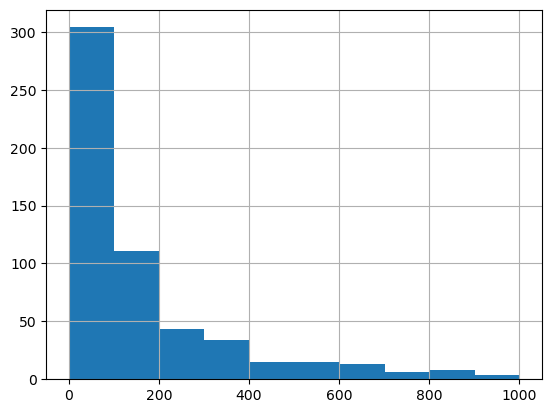

In [21]:
data_no_outliers['<120'].hist()

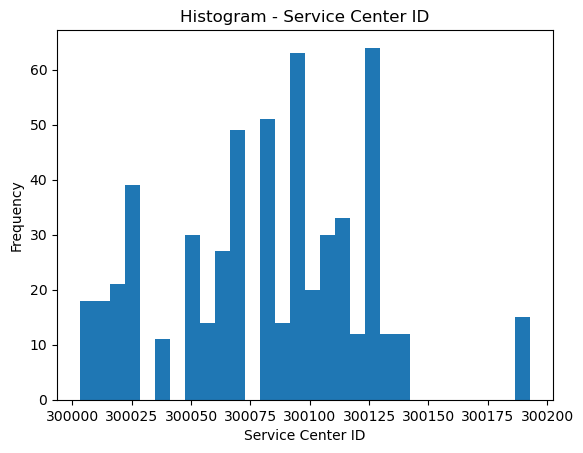

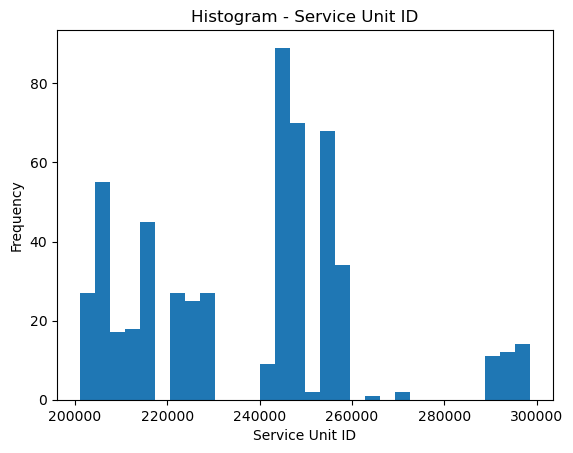

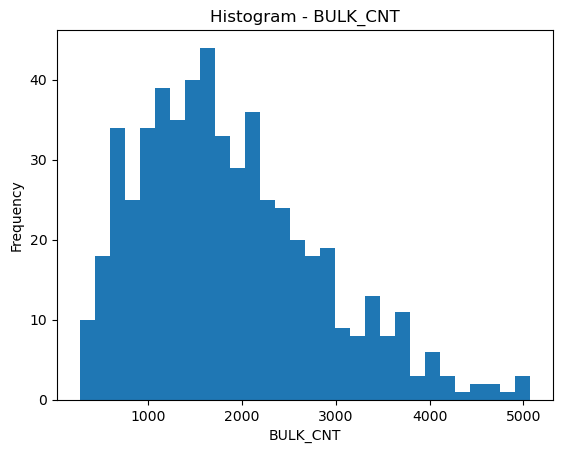

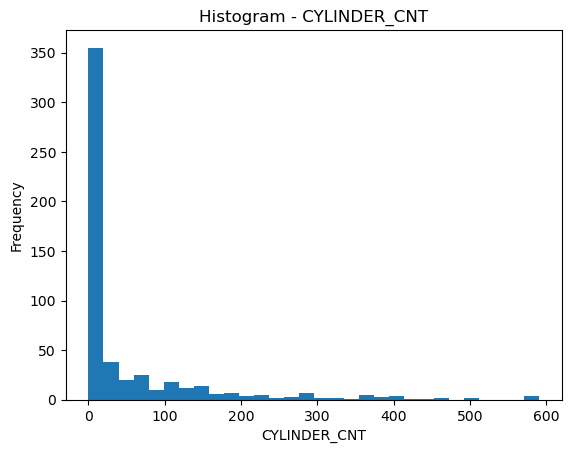

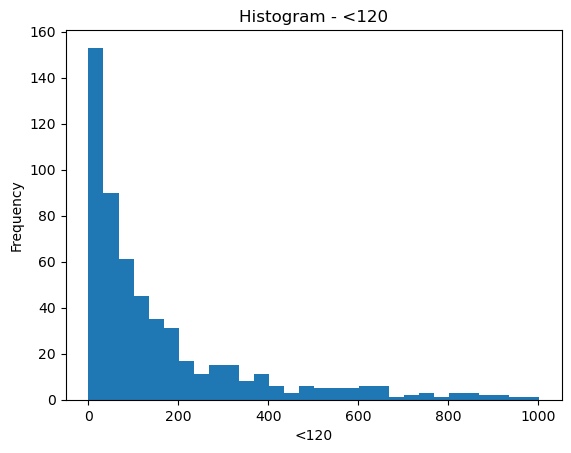

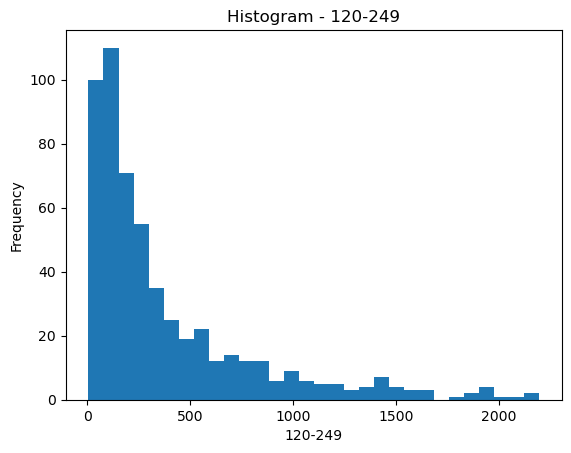

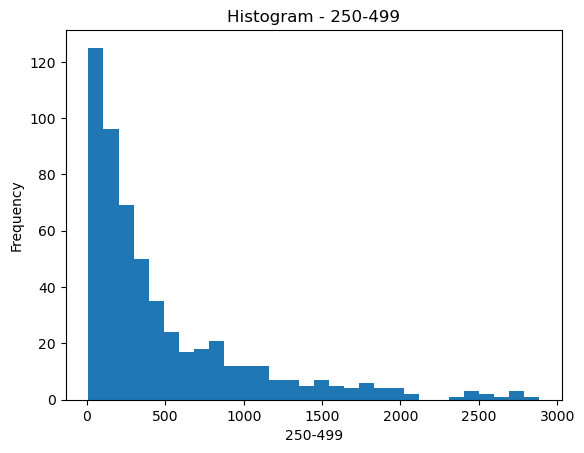

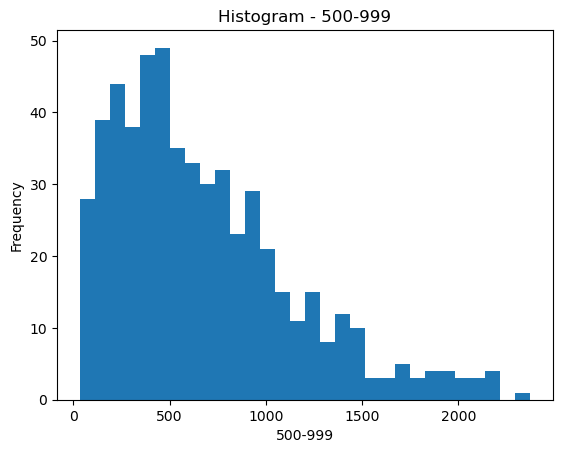

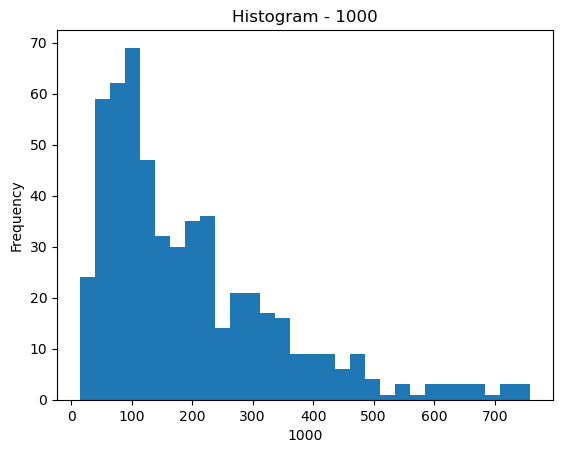

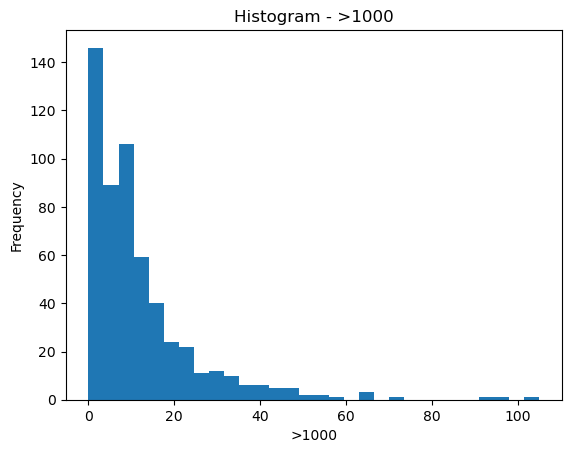

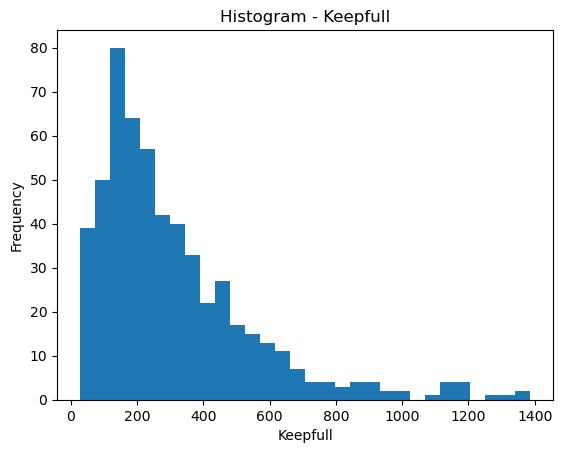

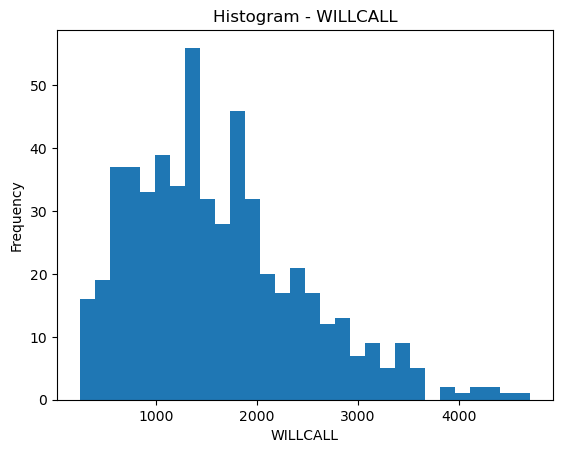

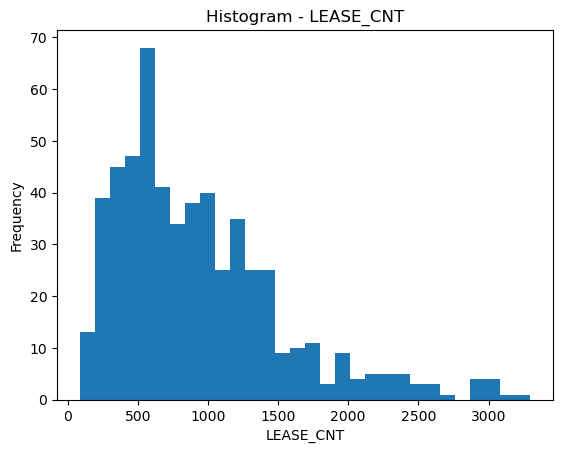

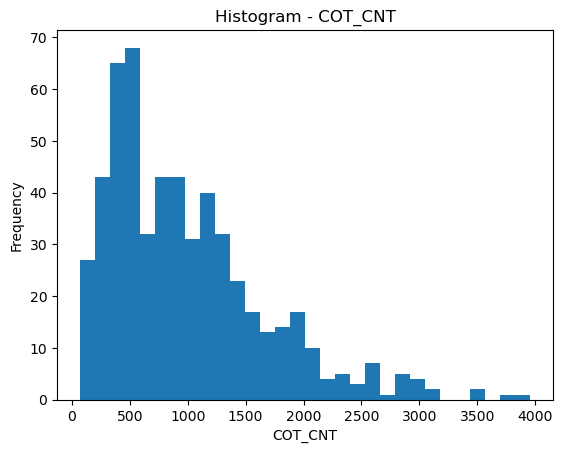

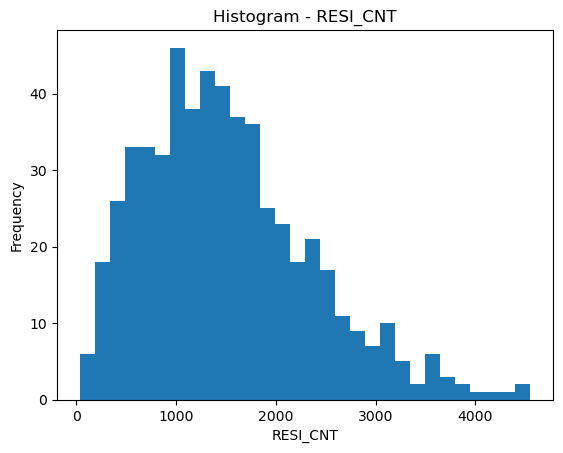

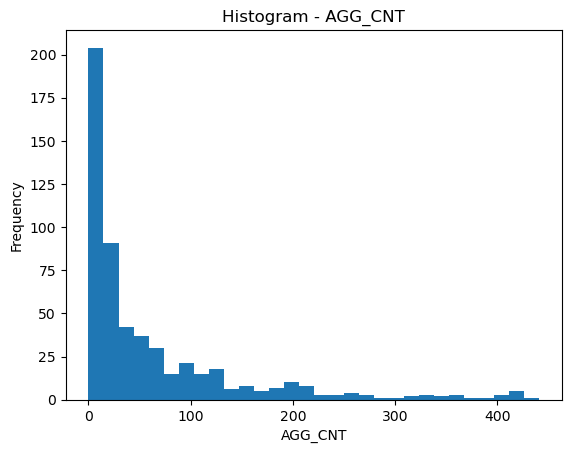

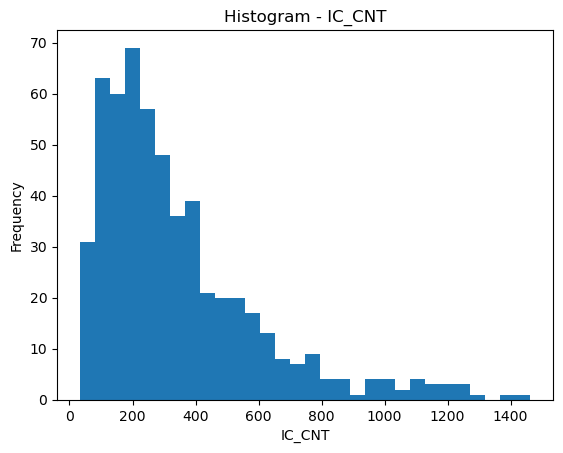

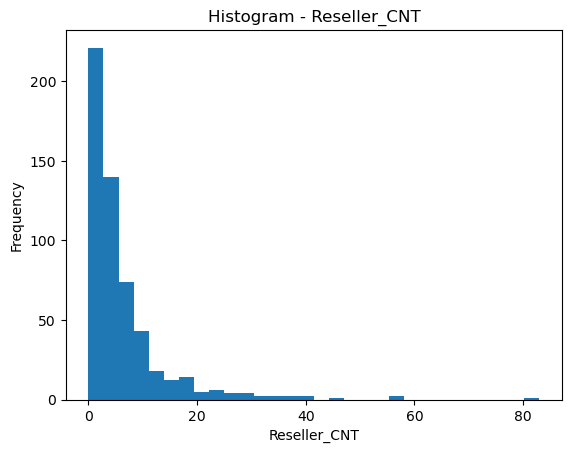

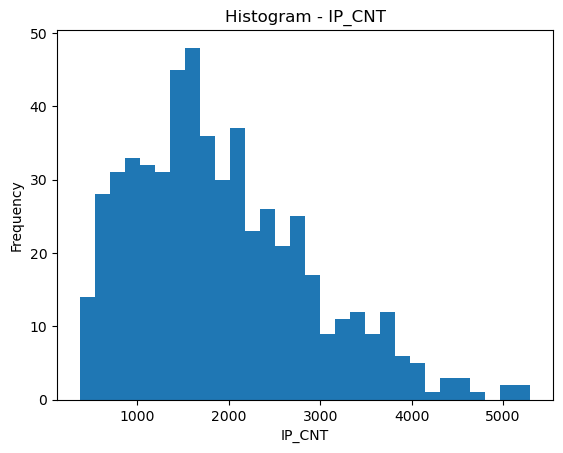

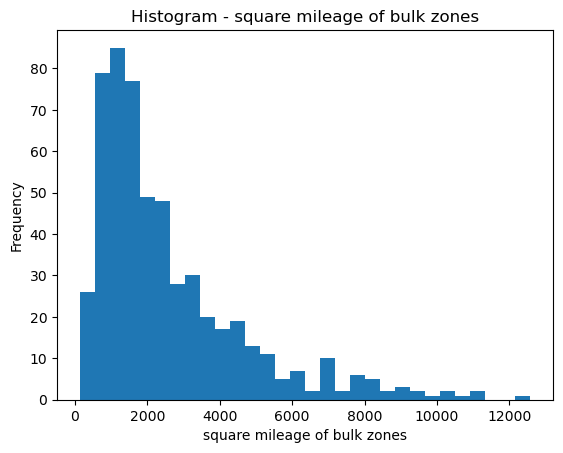

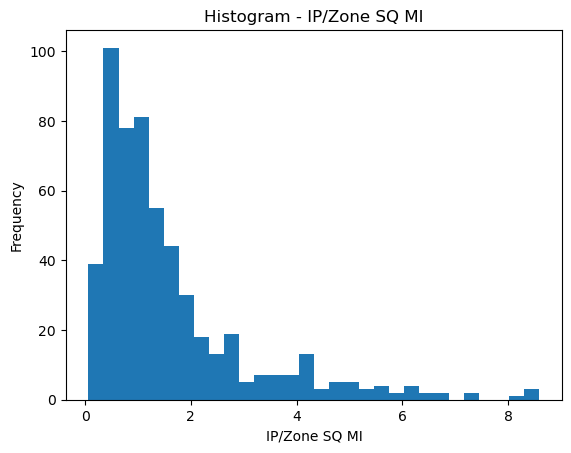

In [22]:
for column in numeric_columns:
    plt.hist(data_no_outliers[column], bins=30)  # You can adjust the number of bins as needed
    plt.title(f'Histogram - {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

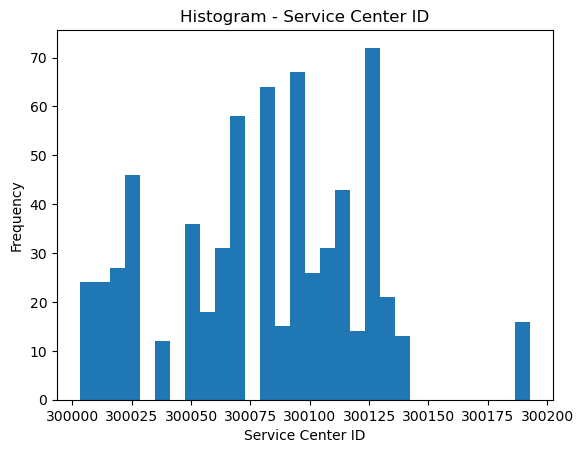

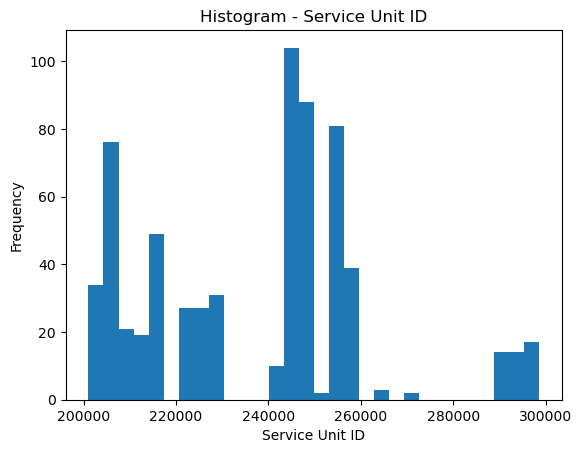

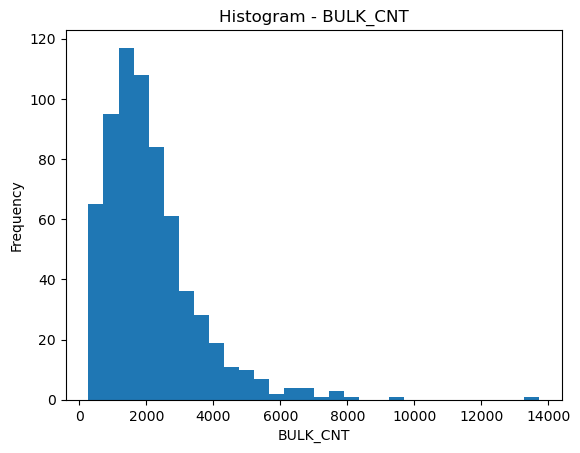

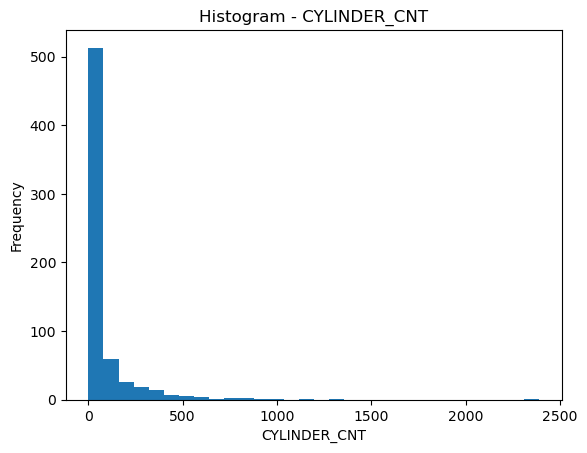

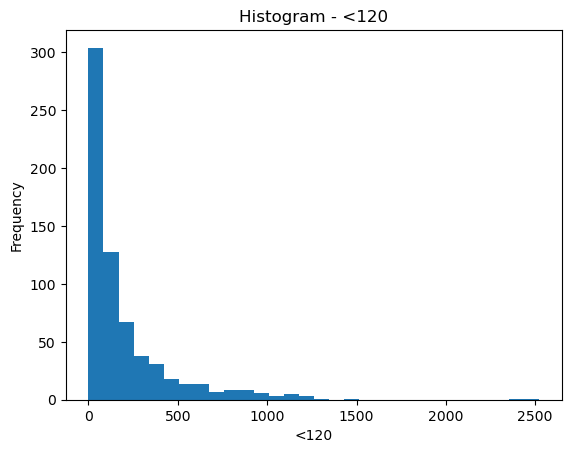

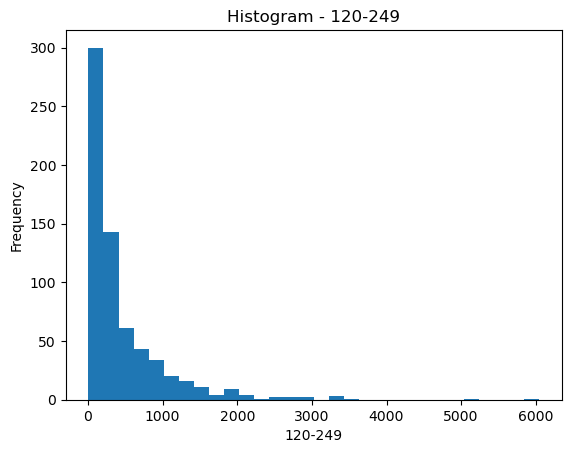

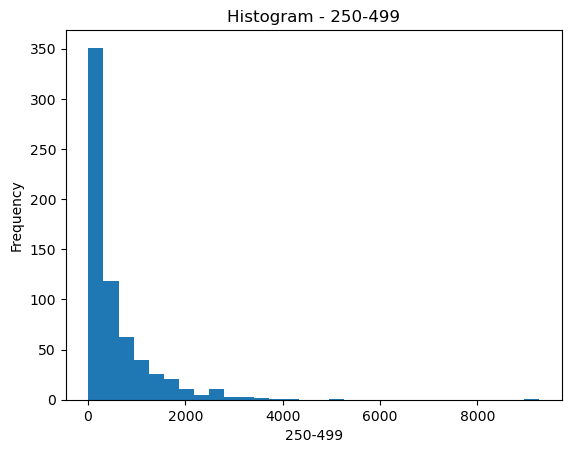

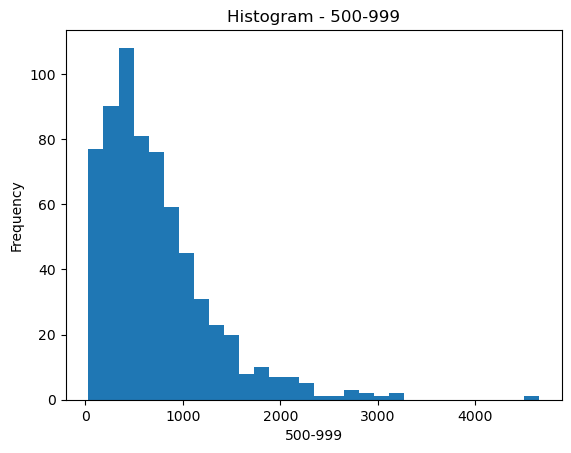

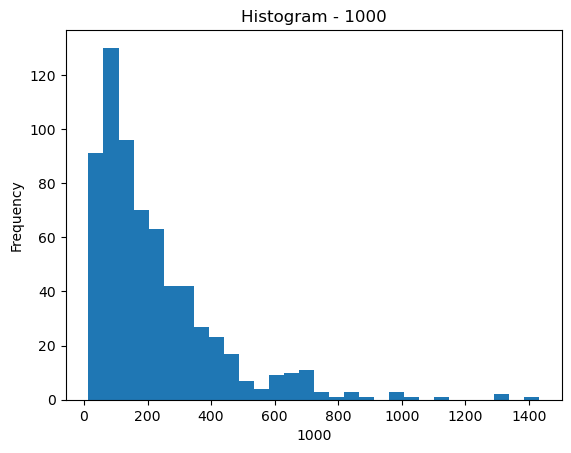

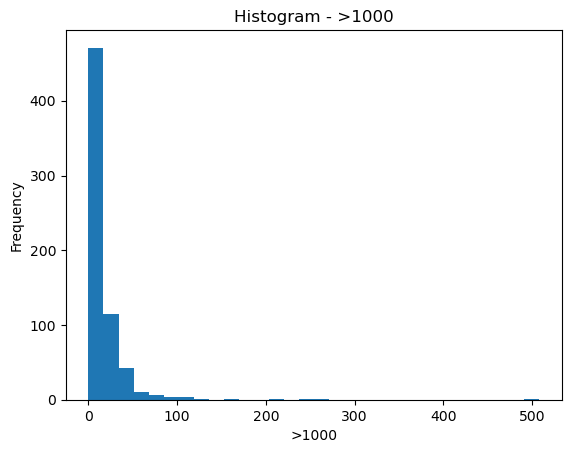

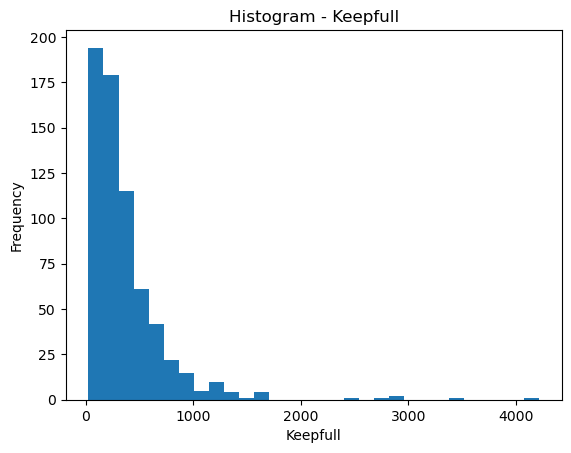

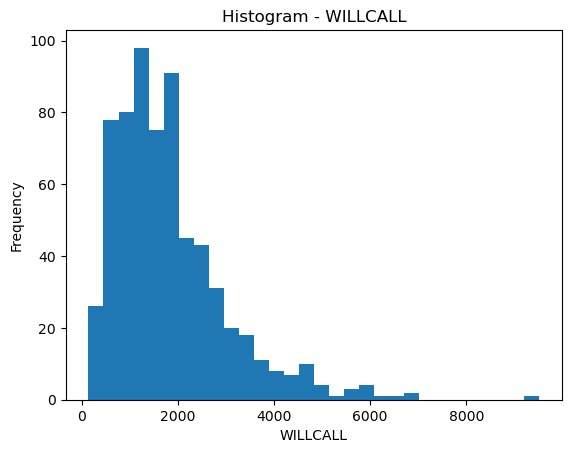

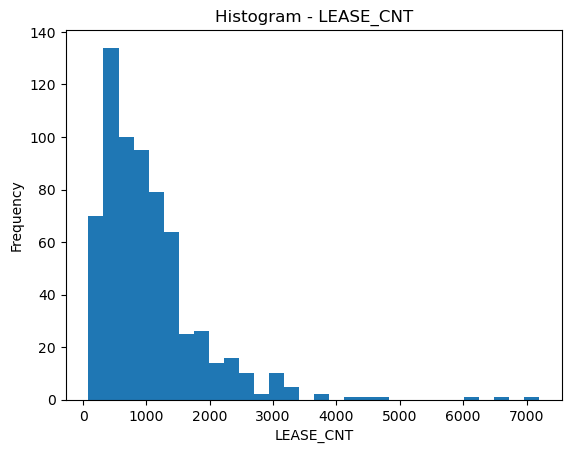

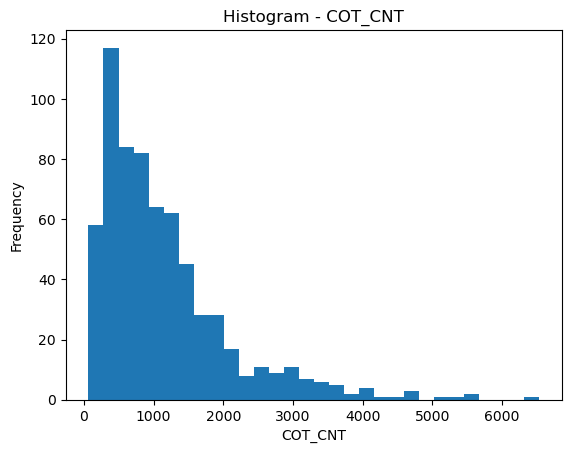

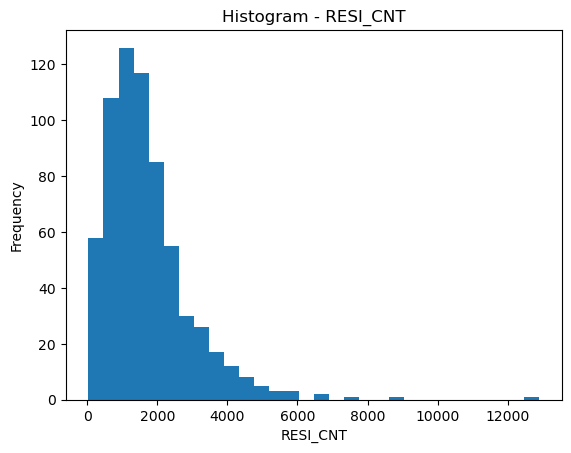

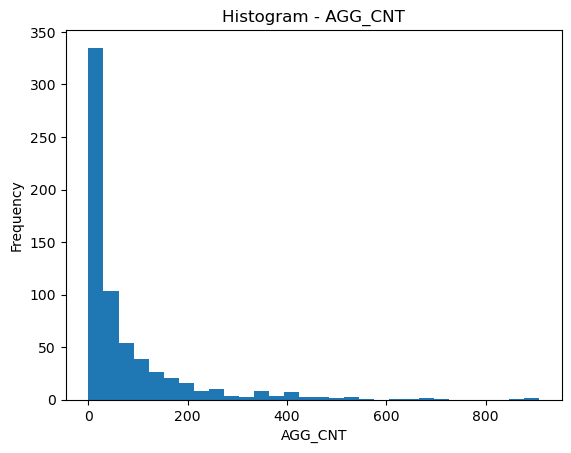

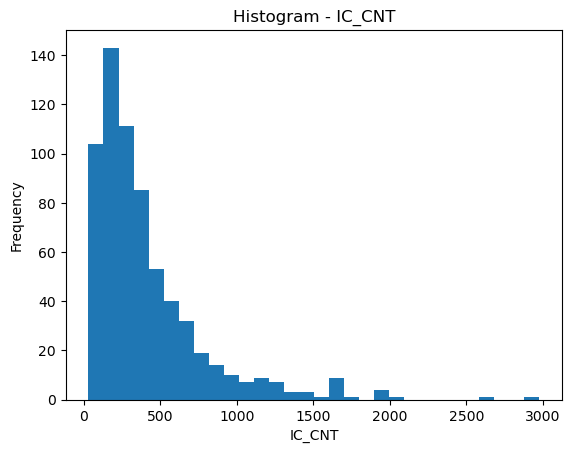

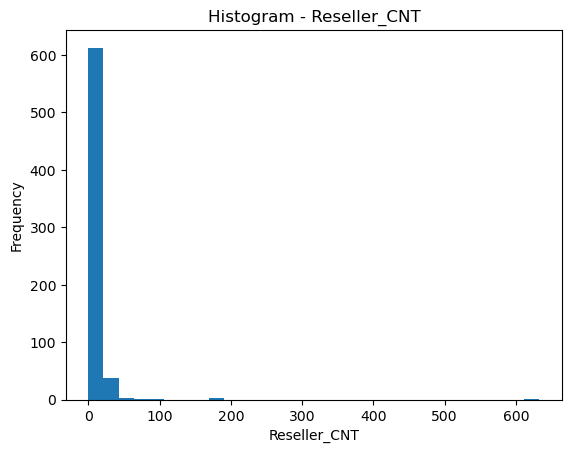

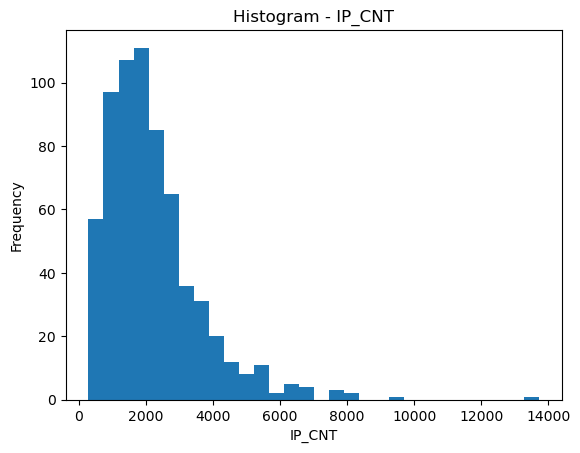

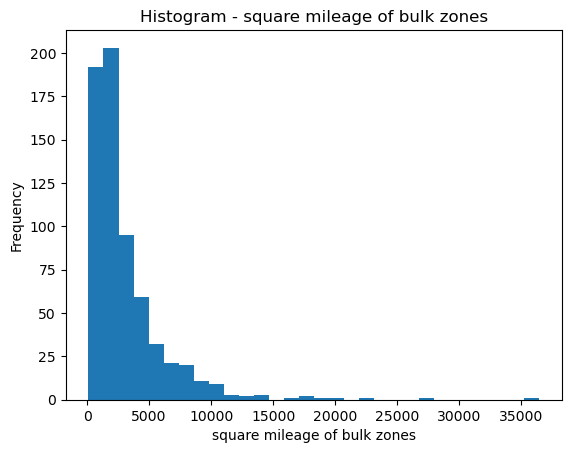

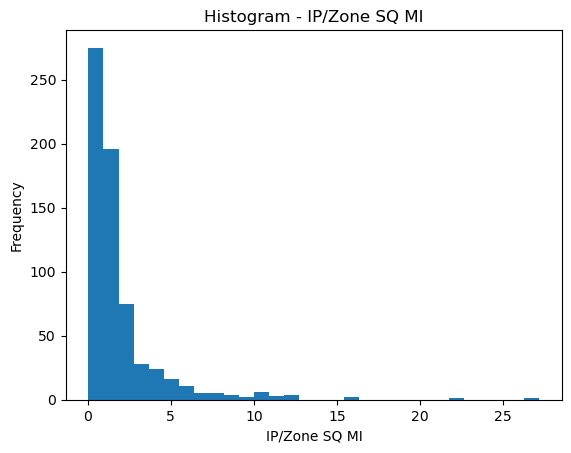

In [23]:
for column in numeric_columns:
    plt.hist(data[column], bins=30)  # You can adjust the number of bins as needed
    plt.title(f'Histogram - {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

sns.pairplot(data)

In [24]:
data['Weather Zone'].unique()

array(['4a', '4b', '3b', '8a', '7b', '7a', '5b', '6a', '6b', '3a', '9a',
       '5a', '8b', '10a', '9b', '10b'], dtype=object)

In [25]:
pd.set_option('display.max_colwidth', 100)
# Set options to display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

In [26]:
#definitons = pd.read_excel('Byron_Dennis_su_cluster_data_2023-01-12.xlsx',sheet_name = 'Definitions')
#definitons

In [27]:
data.shape

(658, 25)

In [28]:
# Checking for missing values in the dataset
missing_values = data.isnull().sum()

# Displaying columns with missing values (if any)
missing_values[missing_values > 0]


Series([], dtype: int64)

In [29]:
data['Region'].unique()

array(['CENTRAL REGION', 'SOUTH REGION', 'WEST REGION', 'EAST REGION'],
      dtype=object)

In [30]:
data['Service Center'].unique()

array(['GRAND RAPIDS MN', 'BIRMINGHAM AL', 'DENVER CO',
       'GRAND JUNCTION CO', 'GREAT LAKES', 'KANSAS CITY MO',
       'COLUMBUS OH', 'HEARTLAND', 'INDIANAPOLIS IN',
       'SOUTHERN CALIFORNIA', 'NORTH ATLANTIC', 'SYRACUSE NY', 'ARIZONA',
       'AUGUSTA GA', 'DALLAS/FT WORTH TX', 'LONE STAR', 'GREAT PLAINS',
       'N WILKESBORO NC', 'RALEIGH NC', 'ST LOUIS MO', 'EAST LANSING MI',
       'KENNEWICK WA', 'PORTLAND OR', 'BLUEGRASS', 'LAKEPORT CA',
       'WEST BRANCH MI', 'SEATTLE WA', 'MEMPHIS TN', 'NEVADA CITY CA',
       'MADISON WI', 'CHICAGO IL', 'JUPITER FL', 'TAMPA BAY FL',
       'SANTA FE NM', 'STRASBURG OH'], dtype=object)

# importing sweetviz
<!-- import sweetviz as sv
#analyzing the dataset
advert_report = sv.analyze(data)
#display the report
advert_report.show_html('Advertising.html') -->

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Region                        658 non-null    object 
 1   Service Center ID             658 non-null    int64  
 2   Service Center                658 non-null    object 
 3   Service Unit ID               658 non-null    int64  
 4   Service Unit                  658 non-null    object 
 5   BULK_CNT                      658 non-null    int64  
 6   CYLINDER_CNT                  658 non-null    int64  
 7   <120                          658 non-null    int64  
 8   120-249                       658 non-null    int64  
 9   250-499                       658 non-null    int64  
 10  500-999                       658 non-null    int64  
 11  1000                          658 non-null    int64  
 12  >1000                         658 non-null    int64  
 13  Keepf

In [32]:
data.isnull().sum()

Region                          0
Service Center ID               0
Service Center                  0
Service Unit ID                 0
Service Unit                    0
BULK_CNT                        0
CYLINDER_CNT                    0
<120                            0
120-249                         0
250-499                         0
500-999                         0
1000                            0
>1000                           0
Keepfull                        0
WILLCALL                        0
LEASE_CNT                       0
COT_CNT                         0
RESI_CNT                        0
AGG_CNT                         0
IC_CNT                          0
Reseller_CNT                    0
IP_CNT                          0
Weather Zone                    0
square mileage of bulk zones    0
IP/Zone SQ MI                   0
dtype: int64

In [33]:
data_no_outliers.duplicated().any()

False

In [34]:
data_df = data_no_outliers.copy()

In [35]:
data.describe()

,Service Center ID,Service Unit ID,BULK_CNT,CYLINDER_CNT,<120,120-249,250-499,500-999,1000,>1000,Keepfull,WILLCALL,LEASE_CNT,COT_CNT,RESI_CNT,AGG_CNT,IC_CNT,Reseller_CNT,IP_CNT,square mileage of bulk zones,IP/Zone SQ MI
count,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000
mean,300081.416413,237245.797872,2129.592705,71.542553,200.457447,457.452888,573.258359,728.360182,225.095745,16.510638,370.208207,1830.925532,1044.104863,1157.018237,1700.044073,78.588146,414.281155,8.215805,2201.135258,3088.986322,1.908735
std,41.842095,24447.778494,1413.003946,176.072989,278.383465,607.145883,772.772494,562.050989,198.899640,30.208621,386.855985,1185.728525,811.742881,949.358364,1242.925304,126.520099,372.843035,27.615025,1436.655098,3303.831223,2.541976
min,300003.000000,201020.000000,270.000000,0.000000,0.000000,6.000000,9.000000,33.000000,14.000000,0.000000,27.000000,143.000000,85.000000,66.000000,31.000000,0.000000,32.000000,0.000000,281.000000,109.000000,0.040311
25%,300051.000000,214513.250000,1198.250000,0.000000,34.000000,107.000000,123.000000,340.250000,91.000000,4.000000,150.250000,1010.000000,514.250000,478.000000,885.250000,9.000000,180.000000,2.000000,1228.750000,1173.000000,0.603429
50%,300084.000000,244365.000000,1824.500000,3.500000,97.500000,242.000000,275.500000,609.000000,166.000000,9.000000,269.000000,1584.000000,861.000000,903.000000,1421.500000,28.500000,297.000000,4.000000,1889.500000,2012.000000,1.096663
75%,300113.000000,254037.500000,2680.500000,64.000000,237.000000,576.500000,744.500000,961.000000,299.500000,18.000000,457.000000,2331.750000,1318.250000,1479.750000,2157.000000,91.750000,518.000000,8.000000,2753.500000,3876.500000,2.017316
max,300193.000000,298650.000000,13733.000000,2391.000000,2523.000000,6048.000000,9272.000000,4656.000000,1433.000000,508.000000,4218.000000,9517.000000,7202.000000,6533.000000,12906.000000,908.000000,2976.000000,633.000000,13735.000000,36458.000000,27.180272


Service Center ID and Service Unit ID: These are unique identifiers for service centers and service units.

BULK_CNT, CYLINDER_CNT, <120, 120-249, etc.: These columns seem to represent different categories or metrics related to service performance. The range of values varies significantly across these columns.

LEASE_CNT, COT_CNT, RESI_CNT, etc.: These also appear to be performance-related metrics with varying ranges.

Weather Zone: This column is not included in the summary statistics as it is likely categorical or text-based.

square mileage of bulk zones: The square mileage of bulk zones varies significantly, ranging from 109 to 36,458.


IP/Zone SQ MI: The "Installations per Zone Square Mile" metric ranges from 0.04 to 27.18, indicating a wide range of performance across different zones.

In [36]:
data['Service Center ID'].nunique()

35

<Axes: >

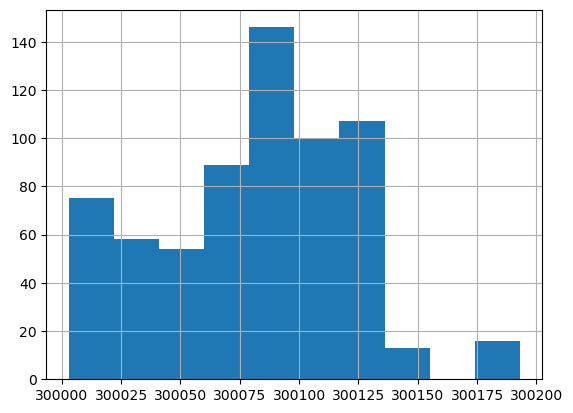

In [37]:
data['Service Center ID'].hist()

In [38]:
data

,Region,Service Center ID,Service Center,Service Unit ID,Service Unit,BULK_CNT,CYLINDER_CNT,<120,120-249,250-499,500-999,1000,>1000,Keepfull,WILLCALL,LEASE_CNT,COT_CNT,RESI_CNT,AGG_CNT,IC_CNT,Reseller_CNT,IP_CNT,Weather Zone,square mileage of bulk zones,IP/Zone SQ MI
0,CENTRAL REGION,300003,GRAND RAPIDS MN,247010,BISMARCK ND,1561,66,79,77,113,680,629,49,105,1522,326,1301,1093,71,458,5,1627,4a,36458,22.408113
1,CENTRAL REGION,300003,GRAND RAPIDS MN,248530,SUPERIOR WI,3126,136,163,434,441,1882,329,13,661,2601,2101,1161,2793,9,453,5,3262,4b,6822,2.091355
2,CENTRAL REGION,300003,GRAND RAPIDS MN,254230,HAYWARD WI,2809,11,44,398,357,1808,210,3,566,2254,1939,881,2522,13,279,6,2820,3b,2411,0.854965
3,CENTRAL REGION,300003,GRAND RAPIDS MN,254290,STAPLES MN,1381,12,76,208,251,721,134,3,173,1220,969,424,1254,29,108,2,1393,4a,1366,0.980617
4,SOUTH REGION,300015,BIRMINGHAM AL,243951,RALEIGH MS,1358,0,28,374,430,152,373,1,27,1331,309,1049,785,524,49,0,1358,8a,3191,2.349779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,SOUTH REGION,300137,SANTA FE NM,201190,CHINLE AZ,3406,0,129,303,2517,290,102,65,68,3338,546,2860,2486,151,759,10,3406,7a,7175,2.106577
654,SOUTH REGION,300137,SANTA FE NM,201230,KAYENTA AZ,1478,0,89,190,949,141,55,54,27,1451,284,1194,1152,7,317,2,1478,7a,8327,5.633965
655,SOUTH REGION,300137,SANTA FE NM,206100,SANTA FE NM,4762,6,56,559,1412,1965,759,17,1170,3598,2195,2573,4434,6,321,7,4768,6b,995,0.208683
656,SOUTH REGION,300137,SANTA FE NM,206120,PECOS NM,1742,0,15,288,804,497,131,7,120,1622,522,1220,1589,6,146,1,1742,6a,552,0.316877


In [39]:
#Normaizing data
import numpy as np

# Re-selecting the relevant features for clustering
clustering_features = data_df.select_dtypes(include=[np.number]).drop(columns=['Service Center ID', 'Service Unit ID'])

clustering_features.columns = clustering_features.columns.astype(str)

# Normalize the features using StandardScaler
scaler = StandardScaler()
normalized_features = scaler.fit_transform(clustering_features)

# Convert the normalized features back to a DataFrame for EDA
normalized_df = pd.DataFrame(normalized_features, columns=clustering_features.columns)

# Show the first few rows of the normalized data
normalized_df.head()


,BULK_CNT,CYLINDER_CNT,<120,120-249,250-499,500-999,1000,>1000,Keepfull,WILLCALL,LEASE_CNT,COT_CNT,RESI_CNT,AGG_CNT,IC_CNT,Reseller_CNT,IP_CNT,square mileage of bulk zones,IP/Zone SQ MI
0,1.318664,0.788182,0.013568,0.112384,-0.085843,2.552838,0.888644,0.082232,1.462968,1.173275,1.938215,0.251492,1.516647,-0.622211,0.435289,-0.130907,1.385049,2.017495,0.329339
1,0.986190,-0.410091,-0.595906,0.027803,-0.238970,2.395675,0.093693,-0.669406,1.065404,0.762007,1.669265,-0.157776,1.196052,-0.576645,-0.245902,-0.009445,0.928023,-0.072516,-0.505119
2,-0.511516,-0.400505,-0.432014,-0.418596,-0.432201,0.087077,-0.414007,-0.669406,-0.579254,-0.463501,0.058884,-0.825759,-0.304001,-0.394379,-0.915349,-0.495294,-0.547488,-0.567655,-0.420315
3,-0.009134,-0.515539,-0.790527,-0.583059,1.243079,-0.490604,-0.667857,-0.819734,-1.060515,0.226292,-0.757928,0.575983,0.169202,0.197983,-0.852710,-0.616756,-0.064613,-0.521221,-0.550924
4,0.353755,-0.505953,-0.795649,-0.637097,1.372508,-0.310078,0.701596,-0.068096,-0.943339,0.604374,-0.935568,1.239581,0.170385,2.806655,-0.394668,-0.616756,0.294184,-0.660997,-0.724660


### EDA

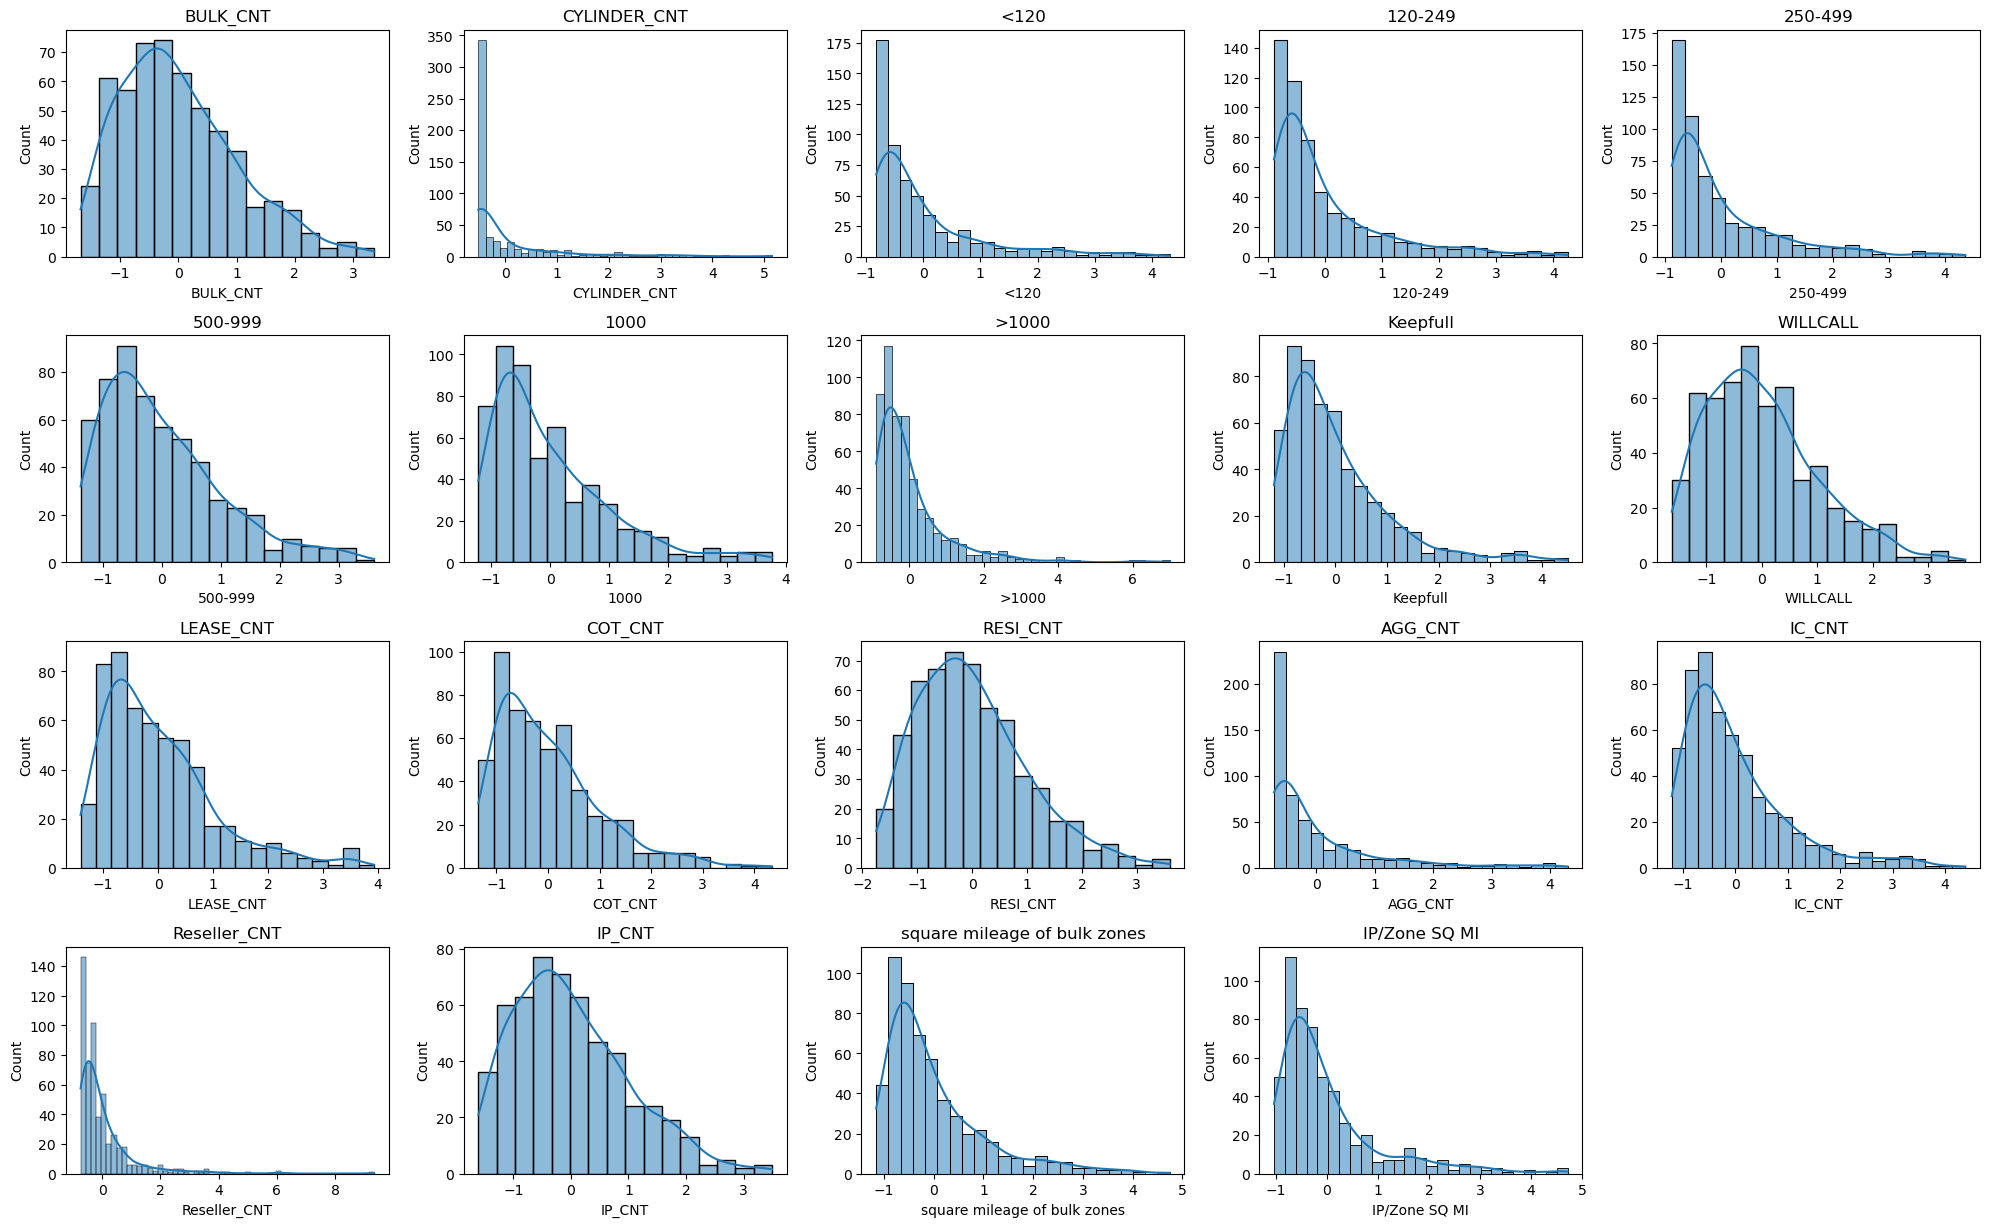

,BULK_CNT,CYLINDER_CNT,<120,120-249,250-499,500-999,1000,>1000,Keepfull,WILLCALL,LEASE_CNT,COT_CNT,RESI_CNT,AGG_CNT,IC_CNT,Reseller_CNT,IP_CNT,square mileage of bulk zones,IP/Zone SQ MI
count,5.530000e+02,5.530000e+02,5.530000e+02,5.530000e+02,5.530000e+02,5.530000e+02,5.530000e+02,5.530000e+02,5.530000e+02,5.530000e+02,5.530000e+02,553.000000,5.530000e+02,5.530000e+02,5.530000e+02,5.530000e+02,5.530000e+02,5.530000e+02,5.530000e+02
mean,-6.986575e-17,-1.927331e-17,5.460771e-17,5.460771e-17,-6.424437e-18,1.606109e-18,6.424437e-17,-4.175884e-17,9.315434e-17,-1.124276e-16,-7.388103e-17,0.000000,-5.942604e-17,-3.212219e-17,6.424437e-18,1.525804e-17,-2.409164e-17,4.175884e-17,-2.569775e-17
std,1.000905e+00,1.000905e+00,1.000905e+00,1.000905e+00,1.000905e+00,1.000905e+00,1.000905e+00,1.000905e+00,1.000905e+00,1.000905e+00,1.000905e+00,1.000905,1.000905e+00,1.000905e+00,1.000905e+00,1.000905e+00,1.000905e+00,1.000905e+00,1.000905e+00
min,-1.676747e+00,-5.155389e-01,-8.212572e-01,-8.931892e-01,-8.733523e-01,-1.374115e+00,-1.215638e+00,-8.948977e-01,-1.190247e+00,-1.626193e+00,-1.408721e+00,-1.349038,-1.750818e+00,-7.247352e-01,-1.212880e+00,-7.382186e-01,-1.608367e+00,-1.155663e+00,-1.040568e+00
25%,-7.558890e-01,-5.155389e-01,-6.676084e-01,-6.770380e-01,-6.764749e-01,-7.433388e-01,-7.279791e-01,-6.694063e-01,-6.922459e-01,-7.479516e-01,-7.180832e-01,-0.773139,-7.417134e-01,-6.336026e-01,-7.000295e-01,-6.167563e-01,-7.563552e-01,-6.974813e-01,-6.594665e-01
50%,-1.675048e-01,-4.867803e-01,-3.910405e-01,-3.927522e-01,-4.066801e-01,-2.378684e-01,-3.271636e-01,-2.935873e-01,-2.946822e-01,-1.826060e-01,-2.233476e-01,-0.219166,-1.371967e-01,-4.285541e-01,-2.889658e-01,-3.738316e-01,-1.680120e-01,-3.411703e-01,-3.434260e-01
75%,5.981289e-01,5.963194e-02,2.030684e-01,3.026907e-01,3.297870e-01,5.352040e-01,5.145491e-01,2.325592e-01,4.083778e-01,5.486690e-01,4.938530e-01,0.461973,5.678755e-01,2.321575e-01,3.922255e-01,1.120177e-01,6.085182e-01,3.363893e-01,2.313095e-01
max,3.362801e+00,5.149894e+00,4.310614e+00,4.249799e+00,4.371241e+00,3.597760e+00,3.761155e+00,6.997301e+00,4.501191e+00,3.676440e+00,3.927119e+00,4.342708,3.599923e+00,4.298951e+00,4.389330e+00,9.343154e+00,3.493364e+00,4.746212e+00,4.717703e+00


In [40]:


import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics of the normalized data
summary_statistics = normalized_df.describe()

# Plotting distribution plots for each feature
plt.figure(figsize=(20, 15))
for i, col in enumerate(normalized_df.columns):
    plt.subplot(5, 5, i + 1)
    sns.histplot(normalized_df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

summary_statistics


The summary statistics confirm that the features have been normalized: the mean of each feature is approximately 0 and the standard deviation is 1, as expected after standard scaling.

The distribution plots for each feature show a variety of shapes. Some of the features are relatively normally distributed, while others are skewed or have a bimodal distribution. There don't appear to be any extreme outliers, which is good for clustering since outliers can sometimes distort the results.

In [41]:
import seaborn as sns

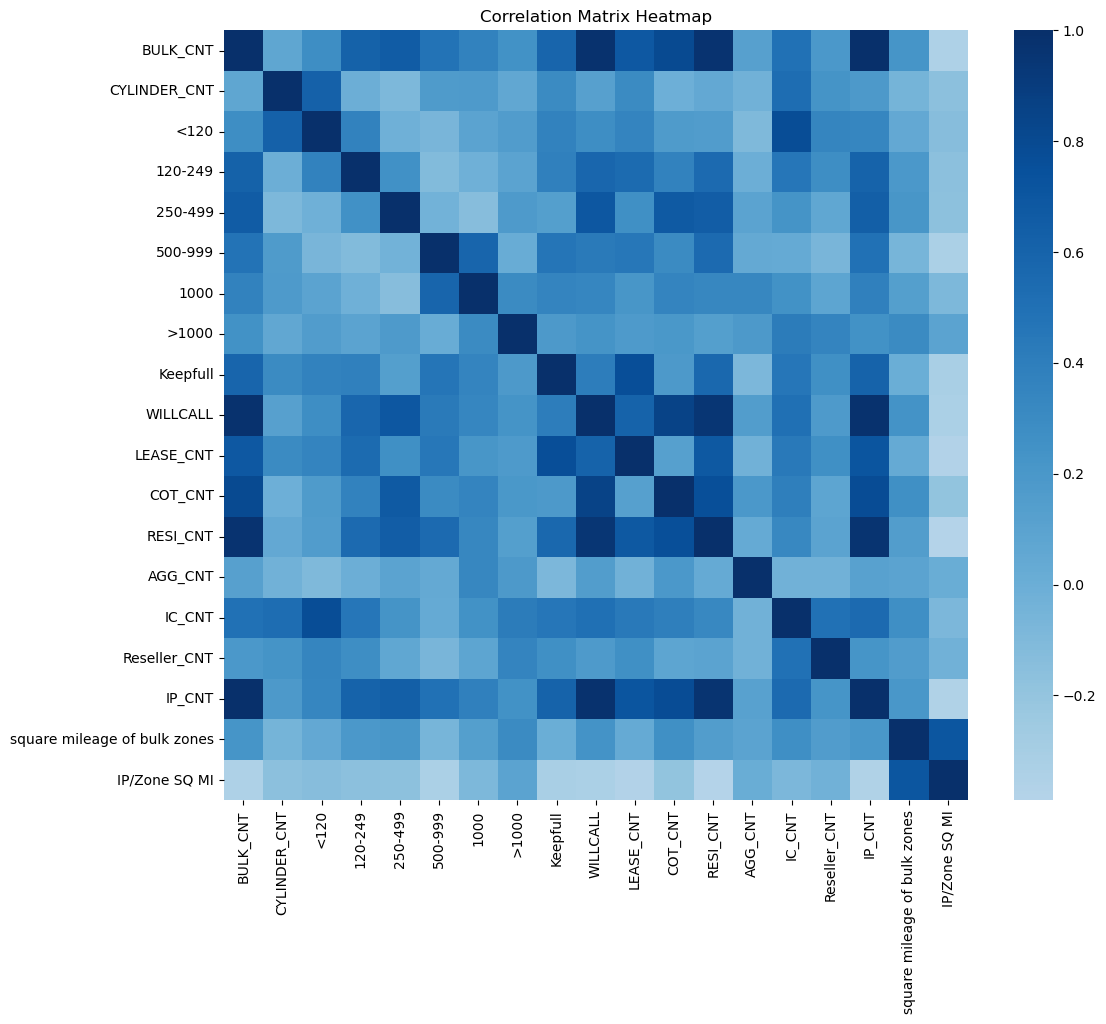

In [42]:
# Compute the correlation matrix
correlation_matrix = normalized_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='Blues', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [43]:
normalized_df.corr()

,BULK_CNT,CYLINDER_CNT,<120,120-249,250-499,500-999,1000,>1000,Keepfull,WILLCALL,LEASE_CNT,COT_CNT,RESI_CNT,AGG_CNT,IC_CNT,Reseller_CNT,IP_CNT,square mileage of bulk zones,IP/Zone SQ MI
BULK_CNT,1.000000,0.077221,0.275324,0.609872,0.659683,0.483188,0.370991,0.244697,0.582571,0.974603,0.689400,0.798439,0.972061,0.117935,0.500511,0.196626,0.994201,0.218952,-0.349487
CYLINDER_CNT,0.077221,1.000000,0.618114,-0.000925,-0.088852,0.168105,0.176838,0.057659,0.302495,0.125231,0.304224,-0.007795,0.052613,-0.025329,0.523788,0.230332,0.183993,-0.048320,-0.159920
<120,0.275324,0.618114,1.000000,0.366150,-0.018502,-0.066781,0.102291,0.163601,0.369516,0.282894,0.353145,0.167019,0.159637,-0.101217,0.775414,0.347804,0.338106,0.055072,-0.129019
120-249,0.609872,-0.000925,0.366150,1.000000,0.254354,-0.115268,-0.015283,0.098019,0.390864,0.578375,0.539953,0.374413,0.547782,0.000447,0.454178,0.278107,0.601156,0.189495,-0.156457
250-499,0.659683,-0.088852,-0.018502,0.254354,1.000000,-0.034421,-0.131490,0.179569,0.132578,0.696938,0.261053,0.675980,0.652136,0.102147,0.230627,0.070711,0.640778,0.213849,-0.163778
500-999,0.483188,0.168105,-0.066781,-0.115268,-0.034421,1.000000,0.588630,0.019173,0.467933,0.434287,0.451545,0.301442,0.550321,0.045066,0.037681,-0.065704,0.494494,-0.062414,-0.331962
1000,0.370991,0.176838,0.102291,-0.015283,-0.131490,0.588630,1.000000,0.299434,0.354144,0.340805,0.214990,0.354698,0.329658,0.331931,0.249274,0.084716,0.384823,0.136079,-0.088385
>1000,0.244697,0.057659,0.163601,0.098019,0.179569,0.019173,0.299434,1.000000,0.182968,0.231830,0.171525,0.198800,0.134060,0.182996,0.419035,0.352405,0.247459,0.302254,0.094495
Keepfull,0.582571,0.302495,0.369516,0.390864,0.132578,0.467933,0.354144,0.182968,1.000000,0.412520,0.765847,0.183736,0.562252,-0.083443,0.457618,0.263126,0.606968,0.006003,-0.318318
WILLCALL,0.974603,0.125231,0.282894,0.578375,0.696938,0.434287,0.340805,0.231830,0.412520,1.000000,0.599772,0.849272,0.945745,0.153774,0.500752,0.176147,0.974341,0.239751,-0.324558


    High Positive Correlation: Features that have a high positive correlation (correlation coefficients close to +1) move in tandem; as one increases, the other tends to increase as well. For example:
        BULK_CNT is highly correlated with IP_CNT, which could indicate that service units with more bulk deliveries also tend to have a higher IP count overall.
        RESI_CNT (residential count) shows a strong positive correlation with several other counts (WILLCALL, LEASE_CNT, COT_CNT, IP_CNT), suggesting that service units with a higher number of residential services also tend to have higher counts in these other categories.

    Moderate Positive Correlation: Some features have a moderate positive correlation (coefficients between +0.5 and +1), which suggests a less strong but still significant positive relationship. For example, AGG_CNT (aggregated count) shows a moderate correlation with BULK_CNT, WILLCALL, and IP_CNT.

    Low Correlation: Several pairs of features have low correlation coefficients (close to 0), which indicates that there is no strong linear relationship between them. For example, CYLINDER_CNT does not show a strong correlation with square mileage of bulk zones, implying that the number of cylinders is not strongly related to the size of the bulk zones.

    Negative Correlation: This dataset does not exhibit strong negative correlations (coefficients close to -1), which would indicate that as one feature increases, the other decreases.

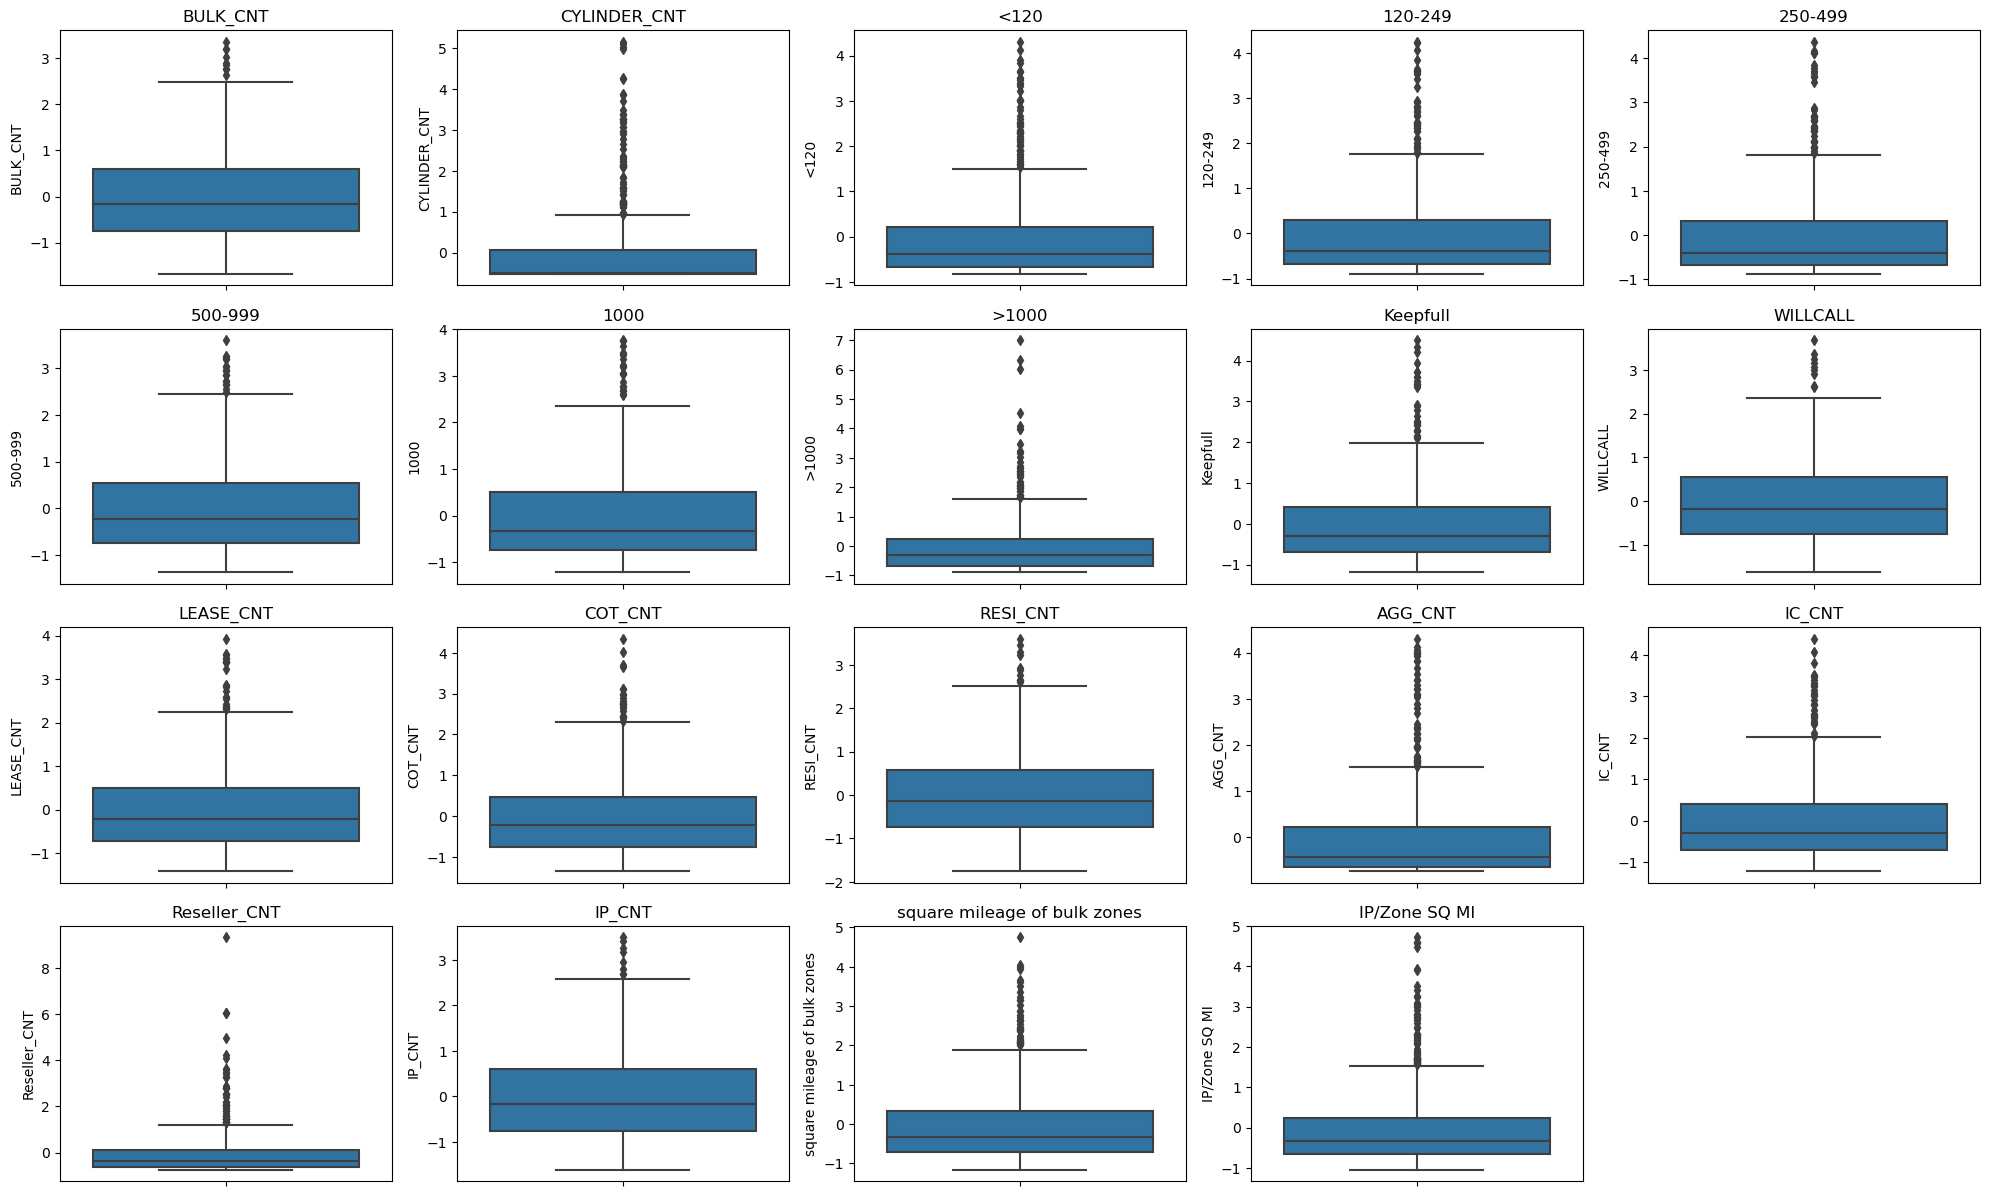

In [44]:
# Plotting boxplots for each feature to check for outliers
plt.figure(figsize=(20, 15))
for i, col in enumerate(normalized_df.columns):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(y=normalized_df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


The boxplots provide a visual summary of each feature's distribution, with potential outliers shown as points beyond the whiskers. There are several features with points that lie outside the whiskers, indicating the presence of outliers. However, given the scale of normalization, these may not be extreme outliers but simply points that are a certain distance from the quartiles.

The box plots provide a visual indication of the distribution of values for each performance metric, highlighting the median, interquartile range, and any potential outliers.

Observations:
BULK_CNT, LEASE_CNT, COT_CNT, RESI_CNT, IC_CNT, and IP_CNT: These metrics all have a significant number of outliers, indicated by the points above the upper whisker of the box plot. This suggests that there are some service units with exceptionally high values for these metrics.

CYLINDER_CNT: There are several outliers in the cylinder count, though the majority of service units have a low cylinder count.

IP/Zone SQ MI: This metric also has a number of outliers, indicating that some service units have a significantly higher number of installations per square mile than the rest.

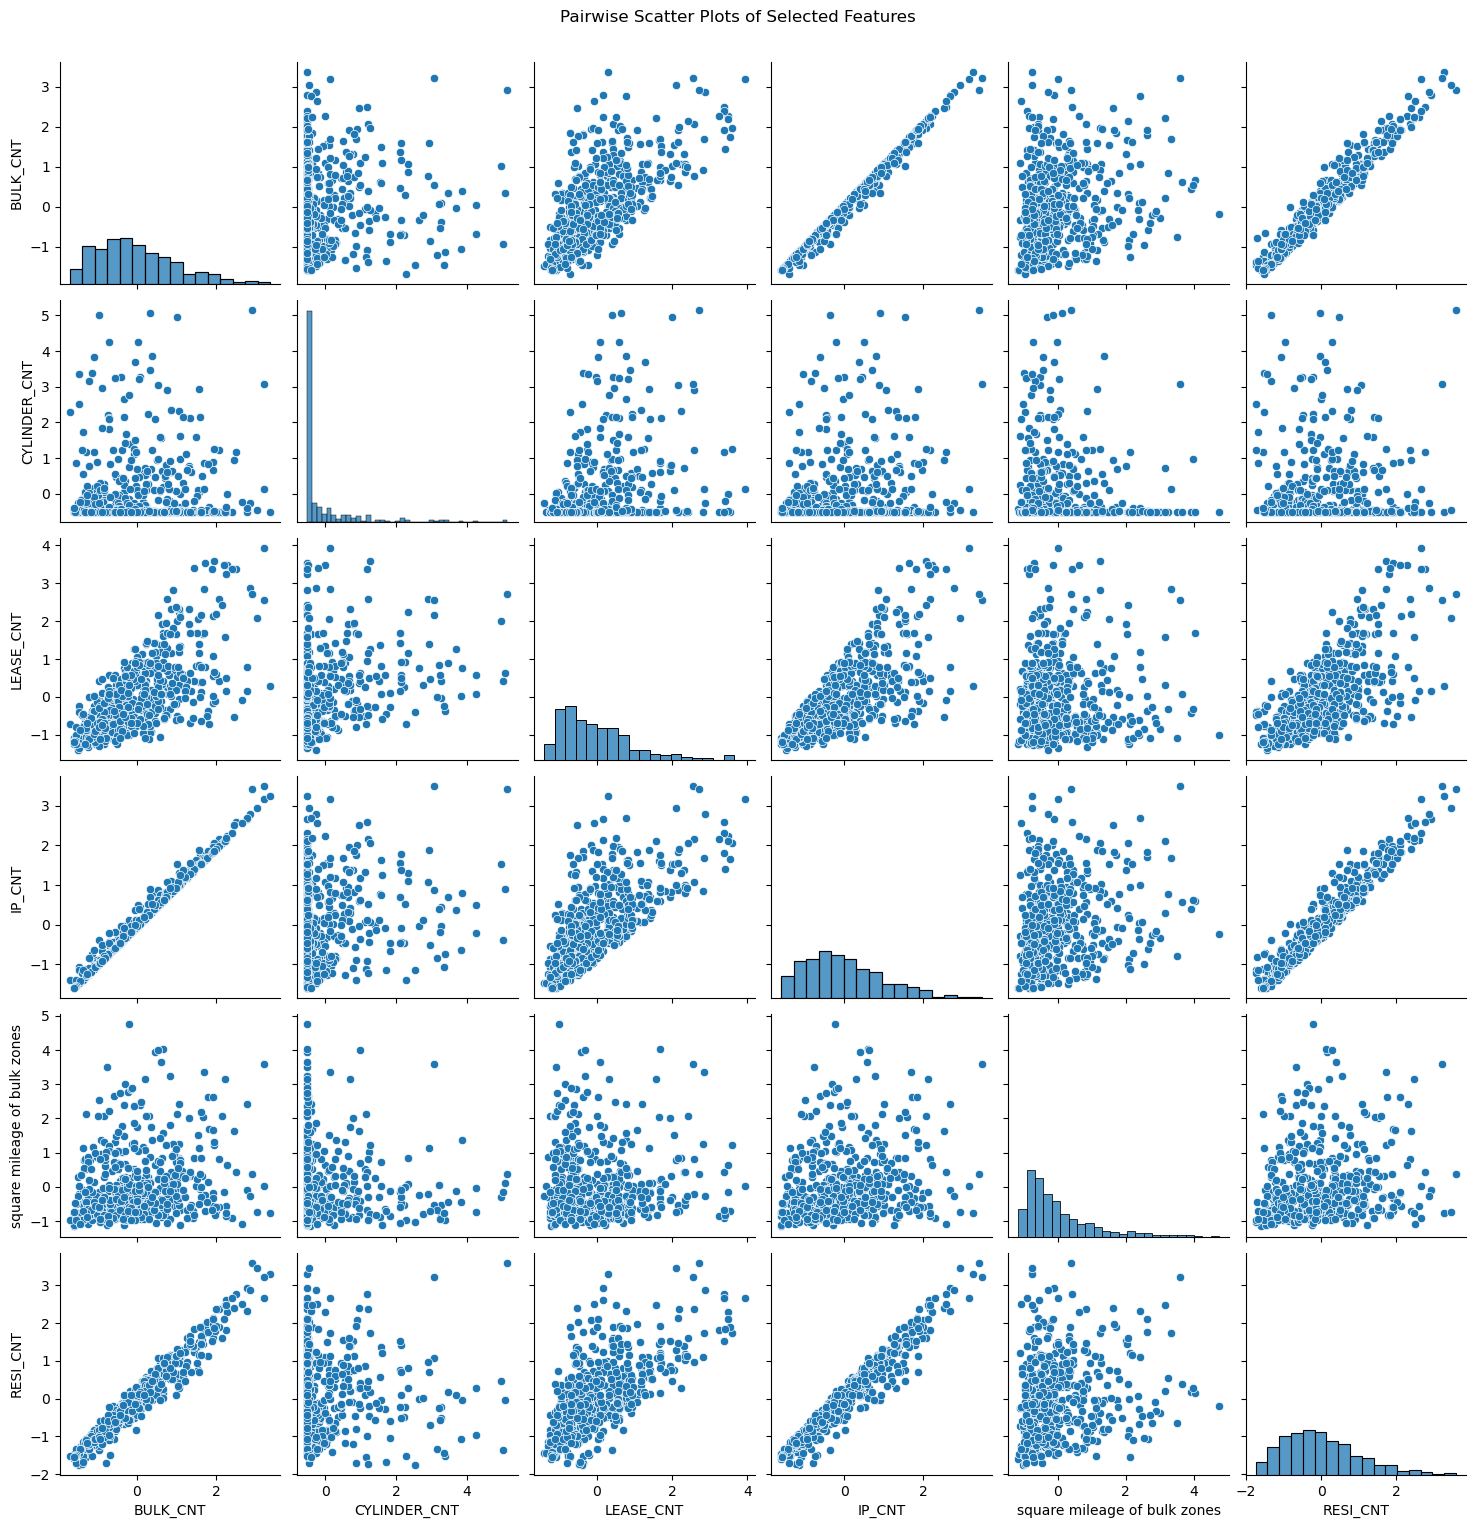

In [45]:
# Selecting a subset of features for pairwise scatter plots
# We choose a mix of features based on their correlation strengths
selected_features = ['BULK_CNT', 'CYLINDER_CNT', 'LEASE_CNT', 'IP_CNT', 'square mileage of bulk zones', 'RESI_CNT']

# Pairwise scatter plots
sns.pairplot(normalized_df[selected_features])
plt.suptitle('Pairwise Scatter Plots of Selected Features', y=1.02) # y=1.02 to adjust the title position
plt.show()


The pairwise scatter plots of the selected features show the relationships between them. Some pairs exhibit a clear linear relationship, others show clusters of points, and some do not display any obvious pattern.

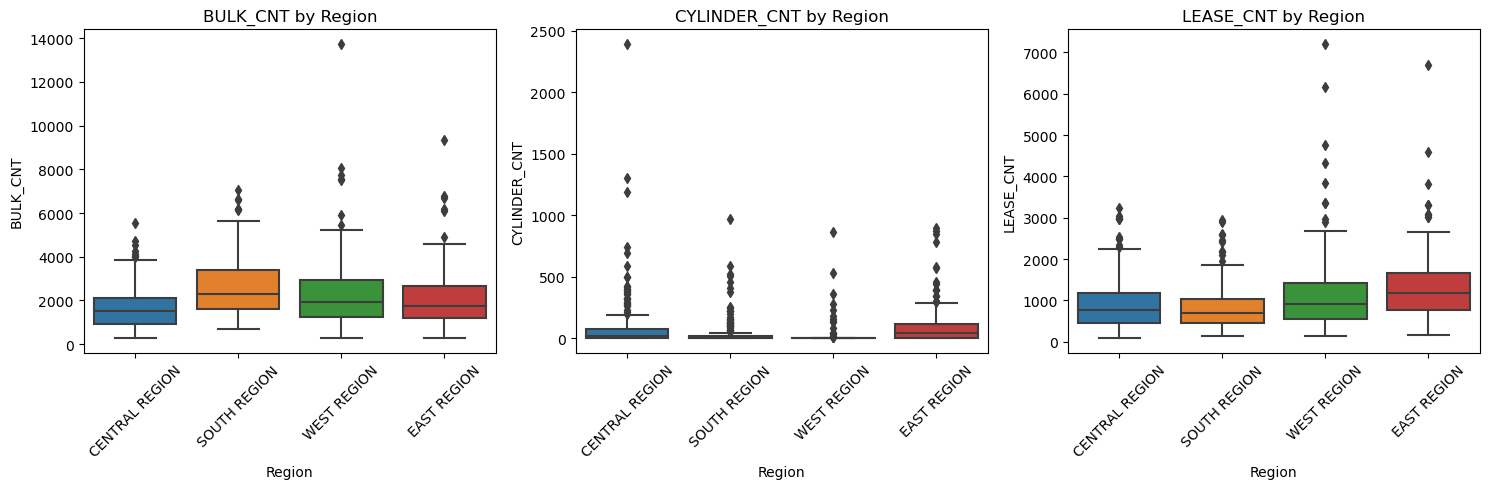

In [46]:
# Feature distributions by region
# We will select a few features to compare across regions and visualize them using boxplots

# Since the original 'Region' data is not normalized, we need to use the original data for regional comparison
selected_features_for_region = ['BULK_CNT', 'CYLINDER_CNT', 'LEASE_CNT']

# Plotting boxplots for selected features across different regions
plt.figure(figsize=(15, 5))
for i, col in enumerate(selected_features_for_region):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=data['Region'], y=data[col])
    plt.title(f'{col} by Region')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The boxplots show the distribution of BULK_CNT, CYLINDER_CNT, and LEASE_CNT across different regions. There are visible differences in the medians and spreads of these features among the regions, which could be indicative of regional performance variations. These insights could be useful for clustering, as they might suggest that regional differences are important factors to consider.

### Feature Engineering

#### Feature Engineering
Given the skewed distribution of many of the performance metrics, it might be beneficial to apply a transformation to these features before clustering. Common transformations include logarithmic or square root transformations, which can help to reduce the impact of extreme values.



#### Clustering
For the clustering phase, we will use the K-Means algorithm, which is a popular choice for clustering due to its simplicity and efficiency. However, K-Means assumes that clusters are spherical and equally sized, which might not be the case here given the distribution of the data. We will also try a density-based algorithm like DBSCAN, which can handle clusters of different shapes and sizes.

#### Steps:
* Data Transformation: Apply transformations to the skewed features.
* Clustering with K-Means: Apply K-Means clustering and evaluate the results.
* Clustering with DBSCAN: Apply DBSCAN clustering and evaluate the results.
* Evaluation: Compare the results of the two clustering algorithms and decide on the best approach.

### Data Preprocessing

In [49]:
data['Weather Zone'].unique()

array(['4a', '4b', '3b', '8a', '7b', '7a', '5b', '6a', '6b', '3a', '9a',
       '5a', '8b', '10a', '9b', '10b'], dtype=object)

In [50]:
weather_mapping = {
    '3a': 'low', '3b': 'low',
    '4a': 'low', '4b': 'low',
    '5a': 'medium', '5b': 'medium',
    '6a': 'medium', '6b': 'medium',
    '7a': 'medium', '7b': 'medium',
    '8a': 'High', '8b': 'High',
    '9a': 'High', '9b': 'High',
    '10a': 'High', '10b': 'High'
}

In [52]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# Assuming 'data_no_outliers' is your dataset
data_log_transformed = data_no_outliers.drop(['Service Center ID', 'Service Unit ID'], axis=1).copy()
data_log_transformed.columns = data_log_transformed.columns.astype(str)
numerical_columns = data_log_transformed.select_dtypes(include=['int64', 'float64']).columns

# Apply log transformation to numerical columns, handling zeros
for column in numerical_columns:
    data_log_transformed[column] = np.log1p(data_log_transformed[column])

# Normalizing the numerical features
scaler = StandardScaler()
data_log_transformed[numerical_columns] = scaler.fit_transform(data_log_transformed[numerical_columns])



In [53]:
data_log_transformed['weather_category'] = data_log_transformed['Weather Zone'].map(weather_mapping)

In [54]:
data_log_transformed.drop('Weather Zone', inplace=True, axis=1)

In [55]:
categorical_columns = ['Region', 'Service Center','Service Unit']
# one_hot_encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid dummy variable trap
#  encoded_categorical = one_hot_encoder.fit_transform(data_log_transformed[categorical_columns])

In [56]:
# Perform one-hot encoding
data_log_transformed = pd.get_dummies(data_log_transformed, columns=categorical_columns, drop_first=True)


In [57]:
label_mapping = {
    'low': 0,
    'medium': 1,
    'high': 2
}

In [58]:
from sklearn.preprocessing import LabelEncoder


In [59]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Map the labels to numerical values
data_log_transformed['weather_category'] = label_encoder.fit_transform(data_log_transformed['weather_category'].map(label_mapping))


In [60]:
data_log_transformed.head()

,BULK_CNT,CYLINDER_CNT,<120,120-249,250-499,500-999,1000,>1000,Keepfull,WILLCALL,LEASE_CNT,COT_CNT,RESI_CNT,AGG_CNT,IC_CNT,Reseller_CNT,IP_CNT,square mileage of bulk zones,IP/Zone SQ MI,weather_category,Region_EAST REGION,Region_SOUTH REGION,Region_WEST REGION,Service Center_AUGUSTA GA,Service Center_BIRMINGHAM AL,Service Center_BLUEGRASS,Service Center_CHICAGO IL,Service Center_COLUMBUS OH,Service Center_DALLAS/FT WORTH TX,Service Center_DENVER CO,Service Center_EAST LANSING MI,Service Center_GRAND JUNCTION CO,Service Center_GRAND RAPIDS MN,Service Center_GREAT LAKES,Service Center_GREAT PLAINS,Service Center_HEARTLAND,Service Center_INDIANAPOLIS IN,Service Center_JUPITER FL,Service Center_KANSAS CITY MO,Service Center_KENNEWICK WA,Service Center_LAKEPORT CA,Service Center_LONE STAR,Service Center_MADISON WI,Service Center_MEMPHIS TN,Service Center_N WILKESBORO NC,Service Center_NEVADA CITY CA,Service Center_NORTH ATLANTIC,Service Center_PORTLAND OR,Service Center_RALEIGH NC,Service Center_SANTA FE NM,Service Center_SEATTLE WA,Service Center_SOUTHERN CALIFORNIA,Service Center_ST LOUIS MO,Service Center_STRASBURG OH,Service Center_SYRACUSE NY,Service Center_TAMPA BAY FL,Service Center_WEST BRANCH MI,Service Unit_AHOSKIE NC,Service Unit_ALBERTVILLE AL,Service Unit_ALBIA IA,Service Unit_ALBUQUERQUE NM,Service Unit_ALEXANDRIA MN,Service Unit_ALLIANCE OH,Service Unit_ALPENA MI,Service Unit_AMERICUS GA,Service Unit_AMERY WI,Service Unit_ANDERSON IN,Service Unit_APALACHICOLA FL,Service Unit_APPLETON WI,Service Unit_ARKADELPHIA AR,Service Unit_ASBURY WV,Service Unit_ASHDOWN AR,Service Unit_ASHIPPUN WI,Service Unit_ASHLAND CITY TN,Service Unit_ASHLAND OH,Service Unit_ATLANTA IL,Service Unit_ATLANTA MI,Service Unit_AUSTIN MN,Service Unit_AUSTIN TX SOUTH,Service Unit_AZTEC NM,Service Unit_BAD AXE MI,Service Unit_BAINBRIDGE GA,Service Unit_BALDWIN MI,Service Unit_BARNESVILLE OH,Service Unit_BATAVIA NY,Service Unit_BATON ROUGE LA,Service Unit_BATTLE CREEK MI,Service Unit_BAY CITY MI,Service Unit_BAY CITY TX,Service Unit_BEATTYVILLE KY,Service Unit_BEAUFORT SC,Service Unit_BEAUMONT CA,Service Unit_BECKLEY WV,Service Unit_BEDFORD IN,Service Unit_BELLE CENTER OH,Service Unit_BELLEVILLE MI,Service Unit_BEND OR,Service Unit_BENTON MO,Service Unit_BIG BEAR CA,Service Unit_BIG LAKE MN,Service Unit_BLOUNTSVILLE AL,Service Unit_BLUE RIDGE GA,Service Unit_BOSCOBEL WI,Service Unit_BOSSIER CITY LA,Service Unit_BOWLING GREEN MO,Service Unit_BRAINERD MN,Service Unit_BRIDGEPORT TX,Service Unit_BRILLION WI,Service Unit_BROOKFIELD MO,Service Unit_BROOKHAVEN MS,Service Unit_BROOKINGS OR,Service Unit_BROWNSVILLE TX,Service Unit_BRUNSWICK GA,Service Unit_BUCKEYE AZ,Service Unit_BUENA VISTA GA,Service Unit_BUFFALO MN,Service Unit_BULVERDE TX,Service Unit_BURLINGTON WA,Service Unit_BURLINGTON WI,Service Unit_BUSH LA,Service Unit_BUTLER GA,Service Unit_CADILLAC MI,Service Unit_CAMDEN AR,Service Unit_CAMDENTON MO,Service Unit_CAMP VERDE AZ,Service Unit_CAMPBELLSVILLE KY,Service Unit_CAMPO CA,Service Unit_CANDOR NY,Service Unit_CAROL STREAM IL,Service Unit_CARROLL IA,Service Unit_CARROLLTON GA,Service Unit_CARTERSVILLE GA,Service Unit_CARTHAGE MO,Service Unit_CARTHAGE NY,Service Unit_CASA GRANDE AZ,Service Unit_CASEY IL,Service Unit_CENTREVILLE AL,Service Unit_CHAMA NM,Service Unit_CHANDLER AZ,Service Unit_CHARITON IA,Service Unit_CHARLESTON IL,Service Unit_CHARLESTON SC,Service Unit_CHASKA MN,Service Unit_CHATSWORTH GA,Service Unit_CHATTANOOGA TN,Service Unit_CHEHALIS WA,Service Unit_CHEPACHET RI,Service Unit_CHESTER VA,Service Unit_CHESTERFIELD MI,Service Unit_CHESTERTON IN,Service Unit_CHICAGO HEIGHTS IL,Service Unit_CHILLICOTHE MO,Service Unit_CHILLICOTHE OH,Service Unit_CHINLE AZ,Service Unit_CINCINNATI OH,Service Unit_CLARE MI,Service Unit_CLEVELAND OH,Service Unit_CLINTON AR,Service Unit_COLE CAMP MO,Service Unit_COLORADO SPRINGS CO,Service Unit_COLUMBIA MO,Service Unit_COLUMBUS GA,Service Unit_COLUMBUS NE,Service Unit_CONIFER CO,Service Unit_CONNEAUT LAKE

In [62]:
data_log_transformed.isnull().sum()

BULK_CNT                        0
CYLINDER_CNT                    0
<120                            0
120-249                         0
250-499                         0
                               ..
Service Unit_YAKIMA WA          0
Service Unit_YANKTON SD         0
Service Unit_YORK AL            0
Service Unit_YUCCA VALLEY CA    0
Service Unit_ZEBULON NC         0
Length: 609, dtype: int64

The preprocessing steps have been applied to the data:

    Log Transformation: Numerical features have been log-transformed to reduce the impact of outliers.
    Normalization: The numerical features have been scaled to have a mean of 0 and a standard deviation of 1.
    One-Hot Encoding: The categorical features Region and Weather_Zone have been one-hot encoded, and the original categorical columns have been dropped from the dataset.

The dataset now appears to be in a format suitable for clustering algorithms, with numerical features standardized and categorical features encoded.

plan for applying PCA:

    PCA Fit: Apply PCA to the dataset to determine how many components are needed to explain a substantial amount of the variance.
    Variance Explained: Look at the cumulative variance explained by the components to decide on the number of dimensions to keep.
    PCA Transformation: Transform the dataset into the reduced number of dimensions.

In [63]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

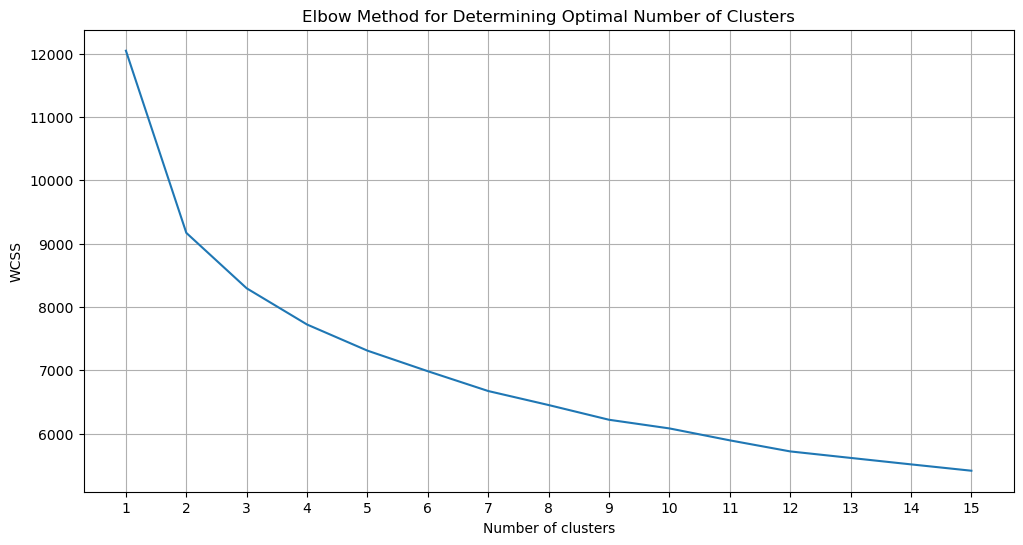

In [64]:
from sklearn.cluster import KMeans

# Running K-Means with a range of k and calculating the within-cluster sum of squares (WCSS)
wcss = []
for i in range(1, 16):  # Testing 1 to 15 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_log_transformed)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(12, 6))
plt.plot(range(1, 16), wcss)
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 16))
plt.grid(True)
plt.show()

### Performing PCA

In [65]:
numerical_columns

Index(['BULK_CNT', 'CYLINDER_CNT', '<120', '120-249', '250-499', '500-999',
       '1000', '>1000', 'Keepfull', 'WILLCALL', 'LEASE_CNT', 'COT_CNT',
       'RESI_CNT', 'AGG_CNT', 'IC_CNT', 'Reseller_CNT', 'IP_CNT',
       'square mileage of bulk zones', 'IP/Zone SQ MI'],
      dtype='object')

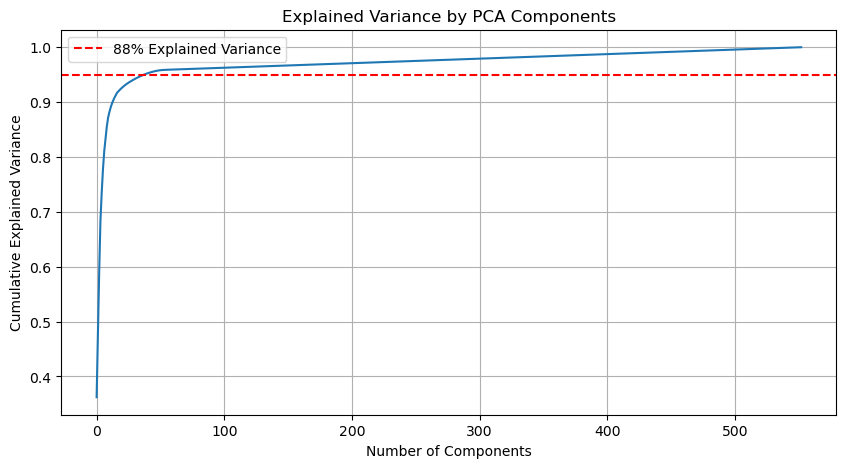

11

In [68]:
from sklearn.decomposition import PCA

# Applying PCA
#pca = PCA().fit(data_log_transformed[list(set(numerical_columns)-set(['Service Center ID', 'Service Unit ID']))])
pca = PCA().fit(data_log_transformed)

# Plotting the cumulative variance explained by the PCA components
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.axhline(y=0.95, color='r', linestyle='--', label='88% Explained Variance')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# How much variance is explained by the first few components
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)
components_needed = np.argmax(cumulative_explained_variance >= 0.88) + 1

components_needed, cumulative_explained_variance
components_needed

The PCA analysis provides the following insights:

    The first 11 components explain 88% of the variance in the dataset.
    The curve of cumulative explained variance flattens out after these components, indicating that each subsequent component contributes less to the explanation of variance.

Based on this, we can reduce the dimensionality of our data to 11 principal components without losing much information. This can make our clustering algorithms more efficient and may even improve their performance by removing noise and less informative variables.

In [92]:
# Transforming the data to the first 11 principal components
pca = PCA(n_components=components_needed)
data_pca_transformed = pca.fit_transform(data_log_transformed[numerical_columns])

# Creating a DataFrame for the PCA-transformed data
data_pca_df = pd.DataFrame(data_pca_transformed, columns=[f'PC{i+1}' for i in range(components_needed)])

# Displaying the first few rows of the PCA-transformed data
data_pca_df.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-3.687996,0.837923,-0.009467,-0.977613,-2.185399,0.184461,-0.250317,0.444242,-0.423816,0.347715,-0.052796
1,-2.538812,-0.730457,-1.201682,-0.246013,-1.472197,0.512507,0.517402,-0.541911,-0.102296,-0.030713,-0.045431
2,0.924904,-0.680800,-1.070643,-0.039569,-0.387057,-0.562347,0.572719,-0.202510,-0.313247,0.574836,0.122836
3,0.827248,-3.518375,0.673768,0.107856,0.569108,-1.056060,-0.051455,-0.971731,-0.437817,-0.307336,-0.578814
4,-0.409954,-2.804842,0.853274,-1.492716,2.079704,-0.465893,-0.419332,-0.180188,-0.485325,-0.433512,-1.114843


The PCA transformation has been completed, and we now have a dataset with 11 principal components (PC1 to PC11). Each row in this dataset represents a service unit with its performance metrics now captured in these reduced dimensions.

The PCA-transformed data is ready for clustering. The principal components are uncorrelated features that represent the original data in a reduced dimensional space, which should be helpful for any clustering algorithm we choose to apply next.

In [74]:
loadings = pca.components_
loadings_df = pd.DataFrame(loadings, columns=numerical_columns, index=[f'PC{i+1}' for i in range(11)])
loadings_df

,BULK_CNT,CYLINDER_CNT,<120,120-249,250-499,500-999,1000,>1000,Keepfull,WILLCALL,LEASE_CNT,COT_CNT,RESI_CNT,AGG_CNT,IC_CNT,Reseller_CNT,IP_CNT,square mileage of bulk zones,IP/Zone SQ MI
PC1,-0.345315,-0.074699,-0.163402,-0.258750,-0.223029,-0.174881,-0.161045,-0.131398,-0.242271,-0.338953,-0.277540,-0.267345,-0.312047,-0.071291,-0.248220,-0.143279,-0.350433,-0.094581,0.139880
PC2,-0.137552,0.380771,0.451221,0.020968,-0.284387,-0.144453,0.081278,0.235136,0.174757,-0.142317,0.076060,-0.185121,-0.254702,0.010041,0.356645,0.364996,-0.088527,0.123609,0.170463
PC3,0.035309,-0.286314,-0.052846,0.113574,0.174112,-0.260371,-0.062063,0.242899,-0.293111,0.075060,-0.242405,0.224852,-0.009374,0.142497,0.097349,0.088726,0.004772,0.512760,0.488438
PC4,0.010569,-0.144517,0.167988,0.334680,0.260987,-0.435672,-0.558305,-0.185379,0.002762,0.003130,0.116469,-0.111184,-0.016423,-0.381925,0.105157,0.127213,0.013960,-0.140446,-0.124646
PC5,-0.022013,-0.154732,0.057957,0.005401,0.043323,-0.284725,0.032053,0.416262,-0.159935,0.008717,-0.203722,0.171859,-0.119878,0.447365,0.080351,0.105981,-0.024317,-0.463828,-0.412704
PC6,0.001680,-0.461553,-0.346659,-0.081902,-0.069660,0.090596,0.166848,0.406085,0.272009,-0.096111,0.089531,-0.092604,-0.025484,-0.434080,-0.024152,0.400432,-0.031580,-0.057420,-0.012880
PC7,0.002456,-0.267240,-0.134441,0.287172,-0.107490,-0.107503,-0.030623,-0.132529,0.231337,-0.080987,0.389132,-0.395274,0.008109,0.595806,-0.200055,0.082589,-0.018928,0.107576,0.069688
PC8,-0.004859,-0.038125,0.063332,-0.028714,0.074670,-0.128696,-0.064737,0.490155,0.251557,-0.063862,0.183861,-0.142845,-0.032261,-0.084194,0.114929,-0.761105,0.002028,0.047239,0.051794
PC9,0.032206,-0.365731,0.199290,0.372920,-0.496794,-0.156119,0.359633,-0.284886,0.126326,-0.018270,-0.203579,0.229507,-0.018516,-0.142393,0.122263,-0.233862,0.000776,-0.063793,-0.002435
PC10,-0.011297,0.224366,0.008098,0.467104,-0.328857,0.075079,-0.014005,0.366011,-0.455675,0.110231,0.108622,-0.120917,0.226744,-0.175819,-0.389990,0.000512,-0.032895,-0.009505,-0.039186


### Clustering with K-Means
We will first use the K-Means clustering algorithm. Since K-Means requires specifying the number of clusters beforehand, we will use the Elbow Method to help determine the optimal number of clusters.

#### Steps:
Determine Optimal Number of Clusters: Use the Elbow Method to find the optimal number of clusters.
Apply K-Means Clustering: Use K-Means to cluster the data based on the selected features and number of clusters.
Evaluate the Results: Analyze the resulting clusters to understand the distribution of service units across clusters and the defining characteristics of each cluster.

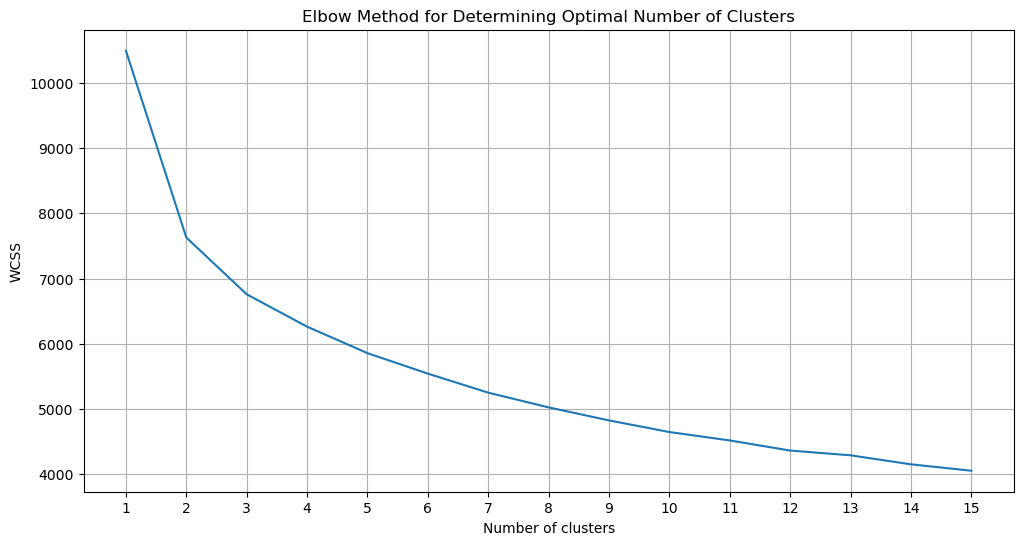

In [91]:
from sklearn.cluster import KMeans

# Running K-Means with a range of k and calculating the within-cluster sum of squares (WCSS)
wcss = []
for i in range(1, 16):  # Testing 1 to 15 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_pca_df)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(12, 6))
plt.plot(range(1, 16), wcss)
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 16))
plt.grid(True)
plt.show()


The Elbow Method plot displays how the inertia (within-cluster sum of squares) decreases as the number of clusters increases. The "elbow" point on the graph represents a balance between precision and computational efficiency, suggesting an optimal number of clusters.

In this case, the elbow point seems to be around 3 or 4 clusters, indicating that this might be an optimal number of clusters for our data.

In [76]:
data_no_outliers.shape

(553, 25)

In [77]:
data_pca_transformed.shape

(553, 11)

In [93]:
# Assuming we determined that the optimal number of clusters is 5 (for example)
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data_pca_df)
#kmeans.fit(data_log_transformed)
# The labels_ attribute of the KMeans object contains the cluster labels for each data point
cluster_labels = kmeans.labels_

# Adding the cluster labels to the original DataFrame
data_no_outliers['Cluster'] = cluster_labels


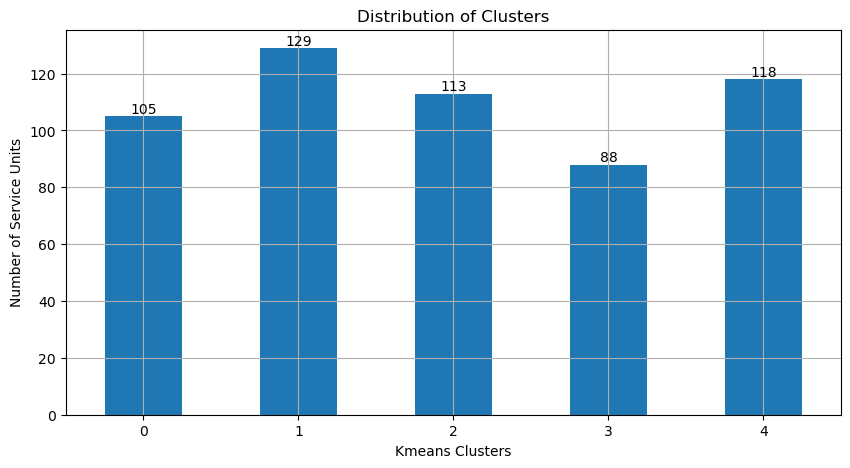

0    105
1    129
2    113
3     88
4    118
Name: Cluster, dtype: int64

In [103]:
# Display the distribution of the data across the clusters
cluster_distribution = data_no_outliers['Cluster'].value_counts().sort_index()

# Plotting the distribution of clusters
plt.figure(figsize=(10, 5))
bars = cluster_distribution.plot(kind='bar')
plt.title('Distribution of Clusters')
plt.xlabel('Kmeans Clusters')
plt.ylabel('Number of Service Units')
plt.xticks(rotation=0)
plt.grid(True)

# Adding the values on top of the bars
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), int(bar.get_height()), 
             ha='center', va='bottom')

plt.show()

# Displaying the cluster distribution values
cluster_distribution

In [80]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data_pca_transformed, kmeans.labels_)
silhouette_avg = silhouette_score(data_log_transformed, kmeans.labels_)

print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.1137681394026494


## Clustering with DBSCAN

In [98]:
# Applying DBSCAN clustering
# These parameters (eps and min_samples) are just starting points and should be tuned based on  dataset
from sklearn.cluster import DBSCAN


dbscan = DBSCAN(eps=2, min_samples=5)
clusters = dbscan.fit_predict(data_pca_df)

# Adding the cluster labels to the original DataFrame
data_no_outliers['DBSCAN_Cluster'] = clusters


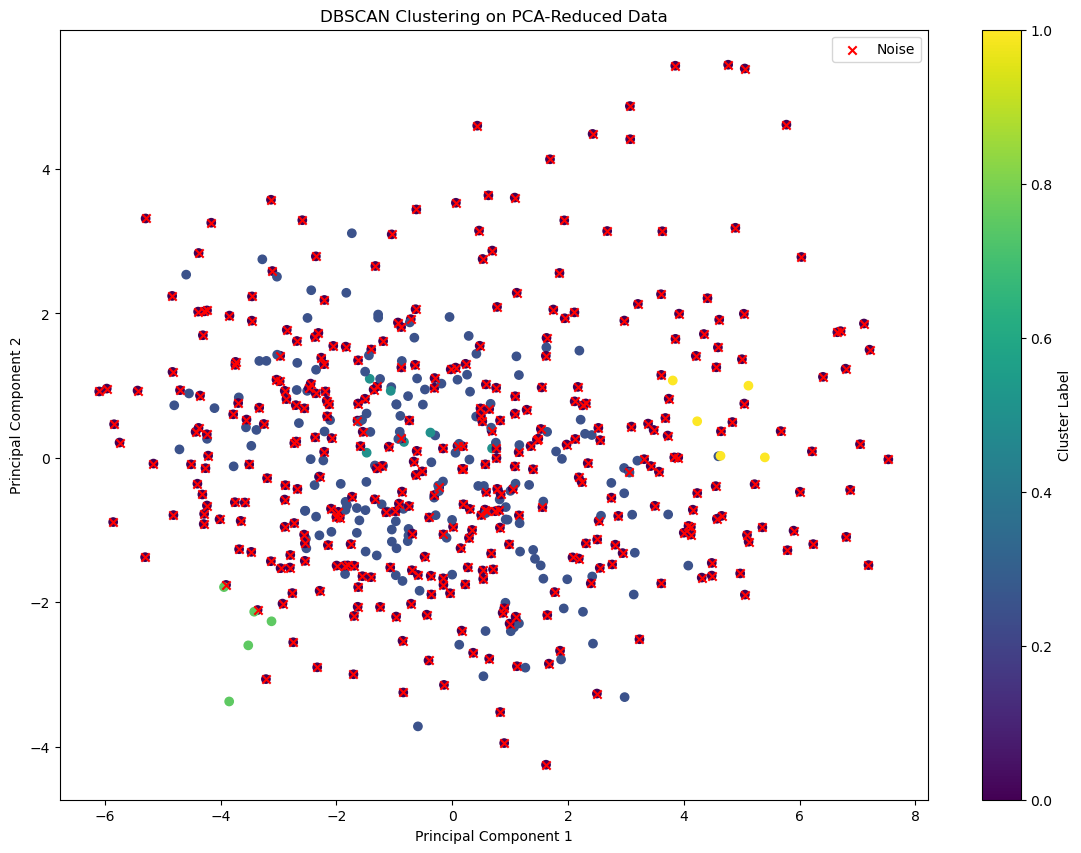

In [100]:
import matplotlib.pyplot as plt

#  we need to perform DBSCAN clustering again with the best parameters
dbscan = DBSCAN(eps=2, min_samples=5)
clusters = dbscan.fit_predict(data_pca_df)

# Adding the cluster labels to the PCA dataframe
data_pca_df['Cluster'] = clusters

# Plotting the first two principal components and color-coding by cluster
plt.figure(figsize=(14, 10))
plt.scatter(data_pca_df['PC1'], data_pca_df['PC2'], c=data_pca_df['Cluster'],  marker='o')

# Distinguish noise points
plt.scatter(data_pca_df.loc[data_pca_df['Cluster'] == -1, 'PC1'], data_pca_df.loc[data_pca_df['Cluster'] == -1, 'PC2'], c='red', marker='x', label='Noise')

plt.title('DBSCAN Clustering on PCA-Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()


The scatter plot visualizes the clusters found by DBSCAN in the first two principal components of the PCA-reduced data. Points are color-coded based on the cluster to which they are assigned, with red 'x' marks representing noise as identified by DBSCAN.

From this visualization, you can see how the data points are grouped and where the algorithm has identified noise. This could provide insights into the structure of the data and how well DBSCAN is able to capture the natural groupings based on the 11-dimensional space reduced to two dimensions for visualization.

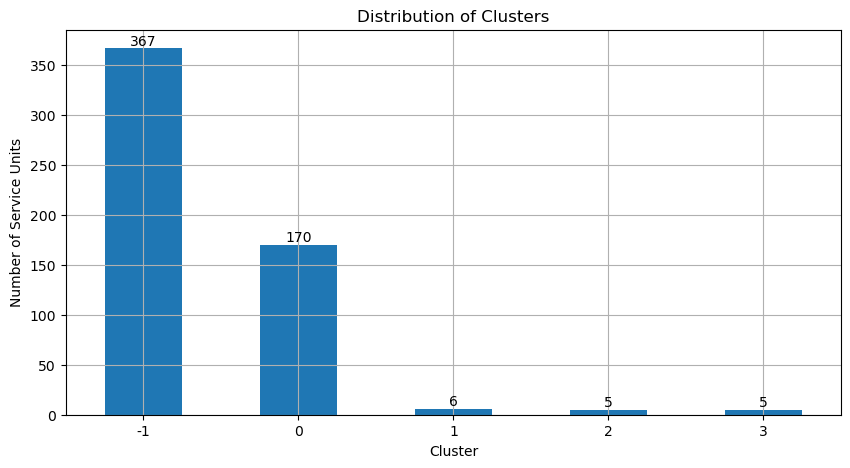

-1    367
 0    170
 1      6
 2      5
 3      5
Name: Cluster, dtype: int64

In [101]:
# Display the distribution of the data across the clusters
cluster_distribution = data_pca_df['Cluster'].value_counts().sort_index()

# Plotting the distribution of clusters
plt.figure(figsize=(10, 5))
bars = cluster_distribution.plot(kind='bar')
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Service Units')
plt.xticks(rotation=0)
plt.grid(True)

# Adding the values on top of the bars
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), int(bar.get_height()), 
             ha='center', va='bottom')

plt.show()

# Displaying the cluster distribution values
cluster_distribution

### Evaluation kmeans

In [102]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data_log_transformed, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.1137681394026494


In [84]:
print(f"Inertia: {kmeans.inertia_}")

Inertia: 5632.3323932234925


incluster cluster distance and shelloutes score

#### Kmeans cluster profiling

In [45]:
data_preprocessed.shape

(658, 41)

In [46]:
len(kmeans.labels_)

658

In [53]:
finalData = data.copy()
finalData['kmeans_clustering'] = kmeans.labels_

In [54]:
finalData.to_excel('clustered_data.xlsx')

In [ ]:
# Get the loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(1, components_needed + 1)],
                        index=numerical_columns)

# Print the loadings
print("Loadings of Original Variables on Principal Components:")
loadings

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'DBSCAN_Cluster' is the column containing cluster labels
clustered_data = data_pca_df.copy()

# Descriptive Statistics for each cluster
cluster_stats = clustered_data.groupby('Cluster').describe()

# Visualizations
for feature in clustered_data.columns[:-1]:  # Exclude the 'DBSCAN_Cluster' column
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=clustered_data)
    plt.title(f'Cluster Profiling: {feature}')
    plt.show()


In [ ]:
# Cluster profiling for DBSCAN
dbscan_profile = data.groupby('DBSCAN_Cluster').mean()

# Cluster profiling for K-Means
kmeans_profile = data.groupby('KMeans_Cluster').mean()

# Display the cluster profiles
#print("DBSCAN Cluster Profiles:\n", dbscan_profile)
#print("\nK-Means Cluster Profiles:\n", kmeans_profile)

In [ ]:
# Function to create plots for cluster profiling
def plot_cluster_profiles(profile, title):
    num_features = len(profile.columns)
    grid_size = 4  # We can adjust this for more or fewer subplots per figure
    num_figures = (num_features + grid_size - 1) // grid_size  # Ceiling division

    for fig_num in range(num_figures):
        plt.figure(figsize=(15, 10))
        for i in range(grid_size):
            feature_index = fig_num * grid_size + i
            if feature_index < num_features:
                column = profile.columns[feature_index]
                plt.subplot(2, 2, i+1)  # Adjust subplot index based on your grid layout
                sns.barplot(x=profile.index, y=profile[column])
                plt.title(column)
                plt.tight_layout()
        plt.suptitle(f'{title} (Part {fig_num+1})')
        plt.show()

# Plotting the profiles for DBSCAN clusters
plot_cluster_profiles(dbscan_profile, 'DBSCAN Cluster Profiles')

# Plotting the profiles for K-Means clusters
plot_cluster_profiles(kmeans_profile, 'K-Means Cluster Profiles')

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'normalized_df' and 'data' are preloaded DataFrames

def plot_distribution():
    # Plotting distribution plots for each feature
    plt.figure(figsize=(20, 15))
    for i, col in enumerate(normalized_df.columns):
        plt.subplot(5, 5, i + 1)
        sns.histplot(normalized_df[col], kde=True)
        plt.title(col)
    plt.tight_layout()
    plt.show()

def plot_summary_statistics():
    summary_statistics = normalized_df.describe()
    print(summary_statistics)

def plot_correlation_matrix():
    correlation_matrix = normalized_df.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=False, cmap='Blues', center=0)
    plt.title('Correlation Matrix Heatmap')
    plt.show()

def pairplot_features():
    # We choose a mix of features based on their correlation strengths
    selected_features = ['BULK_CNT', 'CYLINDER_CNT', 'LEASE_CNT', 'IP_CNT', 'square mileage of bulk zones', 'RESI_CNT']

    # Pairwise scatter plots
    sns.pairplot(normalized_df[selected_features])
    plt.suptitle('Pairwise Scatter Plots of Selected Features', y=1.02) # y=1.02 to adjust the title position
    plt.show()

def plot_boxplots():
    plt.figure(figsize=(20, 15))
    for i, col in enumerate(normalized_df.columns):
        plt.subplot(5, 5, i + 1)
        sns.boxplot(y=normalized_df[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()



# Define plotting functions
def plot_distribution_of_clusters_kmeans():
    cluster_distribution = data['KMeans_Cluster'].value_counts().sort_index()
    plt.figure(figsize=(10, 5))
    bars = cluster_distribution.plot(kind='bar')
    plt.title('Distribution of Clusters')
    plt.xlabel('Kmeans Clusters')
    plt.ylabel('Number of Service Units')
    plt.xticks(rotation=0)
    plt.grid(True)

    for bar in bars.patches:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), int(bar.get_height()), 
                 ha='center', va='bottom')

    plt.show()

def plot_distribution_of_clusters_dbscan():
    cluster_distribution = data['DBSCAN_Cluster'].value_counts().sort_index()
    plt.figure(figsize=(10, 5))
    bars = cluster_distribution.plot(kind='bar')
    plt.title('Distribution of Clusters')
    plt.xlabel('DBSCAN Clusters')
    plt.ylabel('Number of Service Units')
    plt.xticks(rotation=0)
    plt.grid(True)

    for bar in bars.patches:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), int(bar.get_height()), 
                 ha='center', va='bottom')

    plt.show()

# Create a tab output widget to hold the plots
tab = widgets.Tab()

# Add plots to the tab
tab.children = [widgets.Output() for i in range(7)]

# Title the tabs
tab.set_title(0, 'Distribution Plot')
tab.set_title(1, 'Summary Statistics')
tab.set_title(2, 'Heatmap')
tab.set_title(3, 'Pairplot of Correlated features')
tab.set_title(4, 'Box plots')
tab.set_title(5, 'K-Means Cluster Distribution')
tab.set_title(6, 'DBSCAN Cluster Distribution')


# Define a function to handle tab changes
def on_tab_change(change):
    tab_idx = change['new']
    with tab.children[tab_idx]:
        clear_output(wait=True)
        if tab_idx == 0:
            plot_distribution()
        elif tab_idx == 1:
            plot_summary_statistics()
        elif tab_idx == 2:
            plot_correlation_matrix()
        elif tab_idx == 3:
            pairplot_features()
        elif tab_idx == 4:
            plot_boxplots()
        elif tab_idx == 5:
            plot_distribution_of_clusters_kmeans()
        elif tab_idx == 6:
            plot_distribution_of_clusters_dbscan()
        # Add additional elif statements for other plots

# Observe tab change events
tab.observe(on_tab_change, names='selected_index')

# Display the tab
display(tab)

# Trigger the initial plot
tab.selected_index = 0
